# Breast Cancer Analysis

# Section 1: Data Analysis and Preparation

In [1]:
# Importing necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline
pd.set_option('display.max_columns', None)  # To display all columns

In [2]:
# Loading the dataset
data = pd.read_csv('breast-cancer-wisconsin.csv')

# Displaying the head of the dataset
data.head()

842302  M  17.99  10.38   122.8    1001   0.1184   0.2776  0.3001  \
0    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
1  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
2  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
3  84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   
4    843786  M  12.45  15.70   82.57   477.1  0.12780  0.17000  0.1578   

    0.1471  0.2419  0.07871   1.095  0.9053  8.589  153.4  0.006399  0.04904  \
0  0.07017  0.1812  0.05667  0.5435  0.7339  3.398  74.08  0.005225  0.01308   
1  0.12790  0.2069  0.05999  0.7456  0.7869  4.585  94.03  0.006150  0.04006   
2  0.10520  0.2597  0.09744  0.4956  1.1560  3.445  27.23  0.009110  0.07458   
3  0.10430  0.1809  0.05883  0.7572  0.7813  5.438  94.44  0.011490  0.02461   
4  0.08089  0.2087  0.07613  0.3345  0.8902  2.217  27.19  0.007510  0.03345   

   0.05373  0.01587  0.03003  0.006193  25.38  17.33   184.6    2019  0.1622  \
0  0.01860  0.01340  0.01389  0.003532  24.99  23.41  158.80  1956.0  0.1238   
1  0.03832  0.02058  0.02250  0.004571  23.57  25.53  152.50  1709.0  0.1444   
2  0.05661  0.01867  0.05963  0.009208  14.91  26.50   98.87   567.7  0.2098   
3  0.05688  0.01885  0.01756  0.005115  22.54  16.67  152.20  1575.0  0.1374   
4  0.03672  0.01137  0.02165  0.005082  15.47  23.75  103.40   741.6  0.1791   

   0.6656  0.7119  0.2654  0.4601   0.1189  
0  0.1866  0.2416  0.1860  0.2750  0.08902  
1  0.4245  0.4504  0.2430  0.3613  0.08758  
2  0.8663  0.6869  0.2575  0.6638  0.17300  
3  0.2050  0.4000  0.1625  0.2364  0.07678  
4  0.5249  0.5355  0.1741  0.3985  0.12440

In [3]:
# Displaying the tail of the dataset
data.tail()

842302  M  17.99  10.38   122.8    1001   0.1184   0.2776   0.3001  \
563  926424  M  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390   
564  926682  M  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400   
565  926954  M  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251   
566  927241  M  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140   
567   92751  B   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000   

      0.1471  0.2419  0.07871   1.095  0.9053  8.589   153.4  0.006399  \
563  0.13890  0.1726  0.05623  1.1760   1.256  7.673  158.70  0.010300   
564  0.09791  0.1752  0.05533  0.7655   2.463  5.203   99.04  0.005769   
565  0.05302  0.1590  0.05648  0.4564   1.075  3.425   48.55  0.005903   
566  0.15200  0.2397  0.07016  0.7260   1.595  5.772   86.22  0.006522   
567  0.00000  0.1587  0.05884  0.3857   1.428  2.548   19.15  0.007189   

     0.04904  0.05373  0.01587  0.03003  0.006193   25.38  17.33   184.6  \
563  0.02891  0.05198  0.02454  0.01114  0.004239  25.450  26.40  166.10   
564  0.02423  0.03950  0.01678  0.01898  0.002498  23.690  38.25  155.00   
565  0.03731  0.04730  0.01557  0.01318  0.003892  18.980  34.12  126.70   
566  0.06158  0.07117  0.01664  0.02324  0.006185  25.740  39.42  184.60   
567  0.00466  0.00000  0.00000  0.02676  0.002783   9.456  30.37   59.16   

       2019   0.1622   0.6656  0.7119  0.2654  0.4601   0.1189  
563  2027.0  0.14100  0.21130  0.4107  0.2216  0.2060  0.07115  
564  1731.0  0.11660  0.19220  0.3215  0.1628  0.2572  0.06637  
565  1124.0  0.11390  0.30940  0.3403  0.1418  0.2218  0.07820  
566  1821.0  0.16500  0.86810  0.9387  0.2650  0.4087  0.12400  
567   268.6  0.08996  0.06444  0.0000  0.0000  0.2871  0.07039

In [4]:
# Dataset info
data.info()
# Dataset shape
print('\nThe Shape of  Dataset is',data.shape )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   842302    568 non-null    int64  
 1   M         568 non-null    object 
 2   17.99     568 non-null    float64
 3   10.38     568 non-null    float64
 4   122.8     568 non-null    float64
 5   1001      568 non-null    float64
 6   0.1184    568 non-null    float64
 7   0.2776    568 non-null    float64
 8   0.3001    568 non-null    float64
 9   0.1471    568 non-null    float64
 10  0.2419    568 non-null    float64
 11  0.07871   568 non-null    float64
 12  1.095     568 non-null    float64
 13  0.9053    568 non-null    float64
 14  8.589     568 non-null    float64
 15  153.4     568 non-null    float64
 16  0.006399  568 non-null    float64
 17  0.04904   568 non-null    float64
 18  0.05373   568 non-null    float64
 19  0.01587   568 non-null    float64
 20  0.03003   568 non-null    float6

In [5]:
# Checking for missing values
print('\nMissing values per column:')
print(data.isnull().sum())


Missing values per column:
842302      0
M           0
17.99       0
10.38       0
122.8       0
1001        0
0.1184      0
0.2776      0
0.3001      0
0.1471      0
0.2419      0
0.07871     0
1.095       0
0.9053      0
8.589       0
153.4       0
0.006399    0
0.04904     0
0.05373     0
0.01587     0
0.03003     0
0.006193    0
25.38       0
17.33       0
184.6       0
2019        0
0.1622      0
0.6656      0
0.7119      0
0.2654      0
0.4601      0
0.1189      0
dtype: int64


In [6]:
# Displying few random entries
print(data.sample(5))

       842302  M   17.99  10.38   122.8    1001   0.1184   0.2776    0.3001  \
535  91979701  M  14.270  22.55   93.77   629.8  0.10380  0.11540  0.146300   
96     862261  B   9.787  19.94   62.11   294.5  0.10240  0.05301  0.006829   
144    869476  B  11.900  14.65   78.11   432.8  0.11520  0.12960  0.037100   
286      8913  B  12.890  13.12   81.89   515.9  0.06955  0.03729  0.022600   
338     89812  M  23.510  24.27  155.10  1747.0  0.10690  0.12830  0.230800   

       0.1471  0.2419  0.07871   1.095  0.9053  8.589   153.4  0.006399  \
535  0.061390  0.1926  0.05982  0.2027  1.8510  1.895   18.54  0.006113   
96   0.007937  0.1350  0.06890  0.3350  2.0430  2.132   20.05  0.011130   
144  0.030030  0.1995  0.07839  0.3962  0.6538  3.021   25.03  0.010170   
286  0.011710  0.1337  0.05581  0.1532  0.4690  1.115   12.68  0.004731   
338  0.141000  0.1797  0.05506  1.0090  0.9245  6.462  164.10  0.006292   

     0.04904   0.05373   0.01587  0.03003  0.006193  25.38  17.33   184.6 

In [7]:
# Dataset columns and their types
print("\nColumns in Breast Cancer Dataset:")
print(data.columns)
print("\nData types in Breast Cancer Dataset:")
print(data.dtypes)


Columns in Breast Cancer Dataset:
Index(['842302', 'M', '17.99', '10.38', '122.8', '1001', '0.1184', '0.2776',
       '0.3001', '0.1471', '0.2419', '0.07871', '1.095', '0.9053', '8.589',
       '153.4', '0.006399', '0.04904', '0.05373', '0.01587', '0.03003',
       '0.006193', '25.38', '17.33', '184.6', '2019', '0.1622', '0.6656',
       '0.7119', '0.2654', '0.4601', '0.1189'],
      dtype='object')

Data types in Breast Cancer Dataset:
842302        int64
M            object
17.99       float64
10.38       float64
122.8       float64
1001        float64
0.1184      float64
0.2776      float64
0.3001      float64
0.1471      float64
0.2419      float64
0.07871     float64
1.095       float64
0.9053      float64
8.589       float64
153.4       float64
0.006399    float64
0.04904     float64
0.05373     float64
0.01587     float64
0.03003     float64
0.006193    float64
25.38       float64
17.33       float64
184.6       float64
2019        float64
0.1622      float64
0.6656      float6

In [8]:
# Looping through columns with object data type and printing their unique values
for col in data.select_dtypes(include=['object']).columns:
    print(f"\nUnique values for {col}:")
    print(data[col].unique())


Unique values for M:
['M' 'B']


In [9]:
# Count of categories for categorical variables
for col in data.select_dtypes(include=['object']).columns:
    print(f"\nCount of categories in {col}:")
    print(data[col].value_counts())


Count of categories in M:
M
B    357
M    211
Name: count, dtype: int64


In [10]:
# Statistical analysis
print("\nStatistical analysis for Breast Cancer Dataset:")
print(data.describe())


Statistical analysis for Breast Cancer Dataset:
             842302       17.99       10.38       122.8         1001  \
count  5.680000e+02  568.000000  568.000000  568.000000   568.000000   
mean   3.042382e+07   14.120491   19.305335   91.914754   654.279754   
std    1.251246e+08    3.523416    4.288506   24.285848   351.923751   
min    8.670000e+03    6.981000    9.710000   43.790000   143.500000   
25%    8.692225e+05   11.697500   16.177500   75.135000   420.175000   
50%    9.061570e+05   13.355000   18.855000   86.210000   548.750000   
75%    8.825022e+06   15.780000   21.802500  103.875000   782.625000   
max    9.113205e+08   28.110000   39.280000  188.500000  2501.000000   

           0.1184      0.2776      0.3001      0.1471      0.2419     0.07871  \
count  568.000000  568.000000  568.000000  568.000000  568.000000  568.000000   
mean     0.096321    0.104036    0.088427    0.048746    0.181055    0.062770   
std      0.014046    0.052355    0.079294    0.038617    0.

In [11]:
# Creating a copy of the original dataset before any transformations
original_data = data.copy()

In [12]:
# Removing the ID column
data = data.drop(columns=data.columns[0])

In [13]:
# Encoding the target variable ('M' -> 1, 'B' -> 0)
data[data.columns[0]] = LabelEncoder().fit_transform(data[data.columns[0]])

In [14]:
data.head()

M  17.99  10.38   122.8    1001   0.1184   0.2776  0.3001   0.1471  0.2419  \
0  1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
1  1  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
2  1  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
3  1  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430  0.1809   
4  1  12.45  15.70   82.57   477.1  0.12780  0.17000  0.1578  0.08089  0.2087   

   0.07871   1.095  0.9053  8.589  153.4  0.006399  0.04904  0.05373  0.01587  \
0  0.05667  0.5435  0.7339  3.398  74.08  0.005225  0.01308  0.01860  0.01340   
1  0.05999  0.7456  0.7869  4.585  94.03  0.006150  0.04006  0.03832  0.02058   
2  0.09744  0.4956  1.1560  3.445  27.23  0.009110  0.07458  0.05661  0.01867   
3  0.05883  0.7572  0.7813  5.438  94.44  0.011490  0.02461  0.05688  0.01885   
4  0.07613  0.3345  0.8902  2.217  27.19  0.007510  0.03345  0.03672  0.01137   

   0.03003  0.006193  25.38  17.33   184.6    2019  0.1622  0.6656  0.7119  \
0  0.01389  0.003532  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416   
1  0.02250  0.004571  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504   
2  0.05963  0.009208  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869   
3  0.01756  0.005115  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000   
4  0.02165  0.005082  15.47  23.75  103.40   741.6  0.1791  0.5249  0.5355   

   0.2654  0.4601   0.1189  
0  0.1860  0.2750  0.08902  
1  0.2430  0.3613  0.08758  
2  0.2575  0.6638  0.17300  
3  0.1625  0.2364  0.07678  
4  0.1741  0.3985  0.12440

# Section 2: Visualization

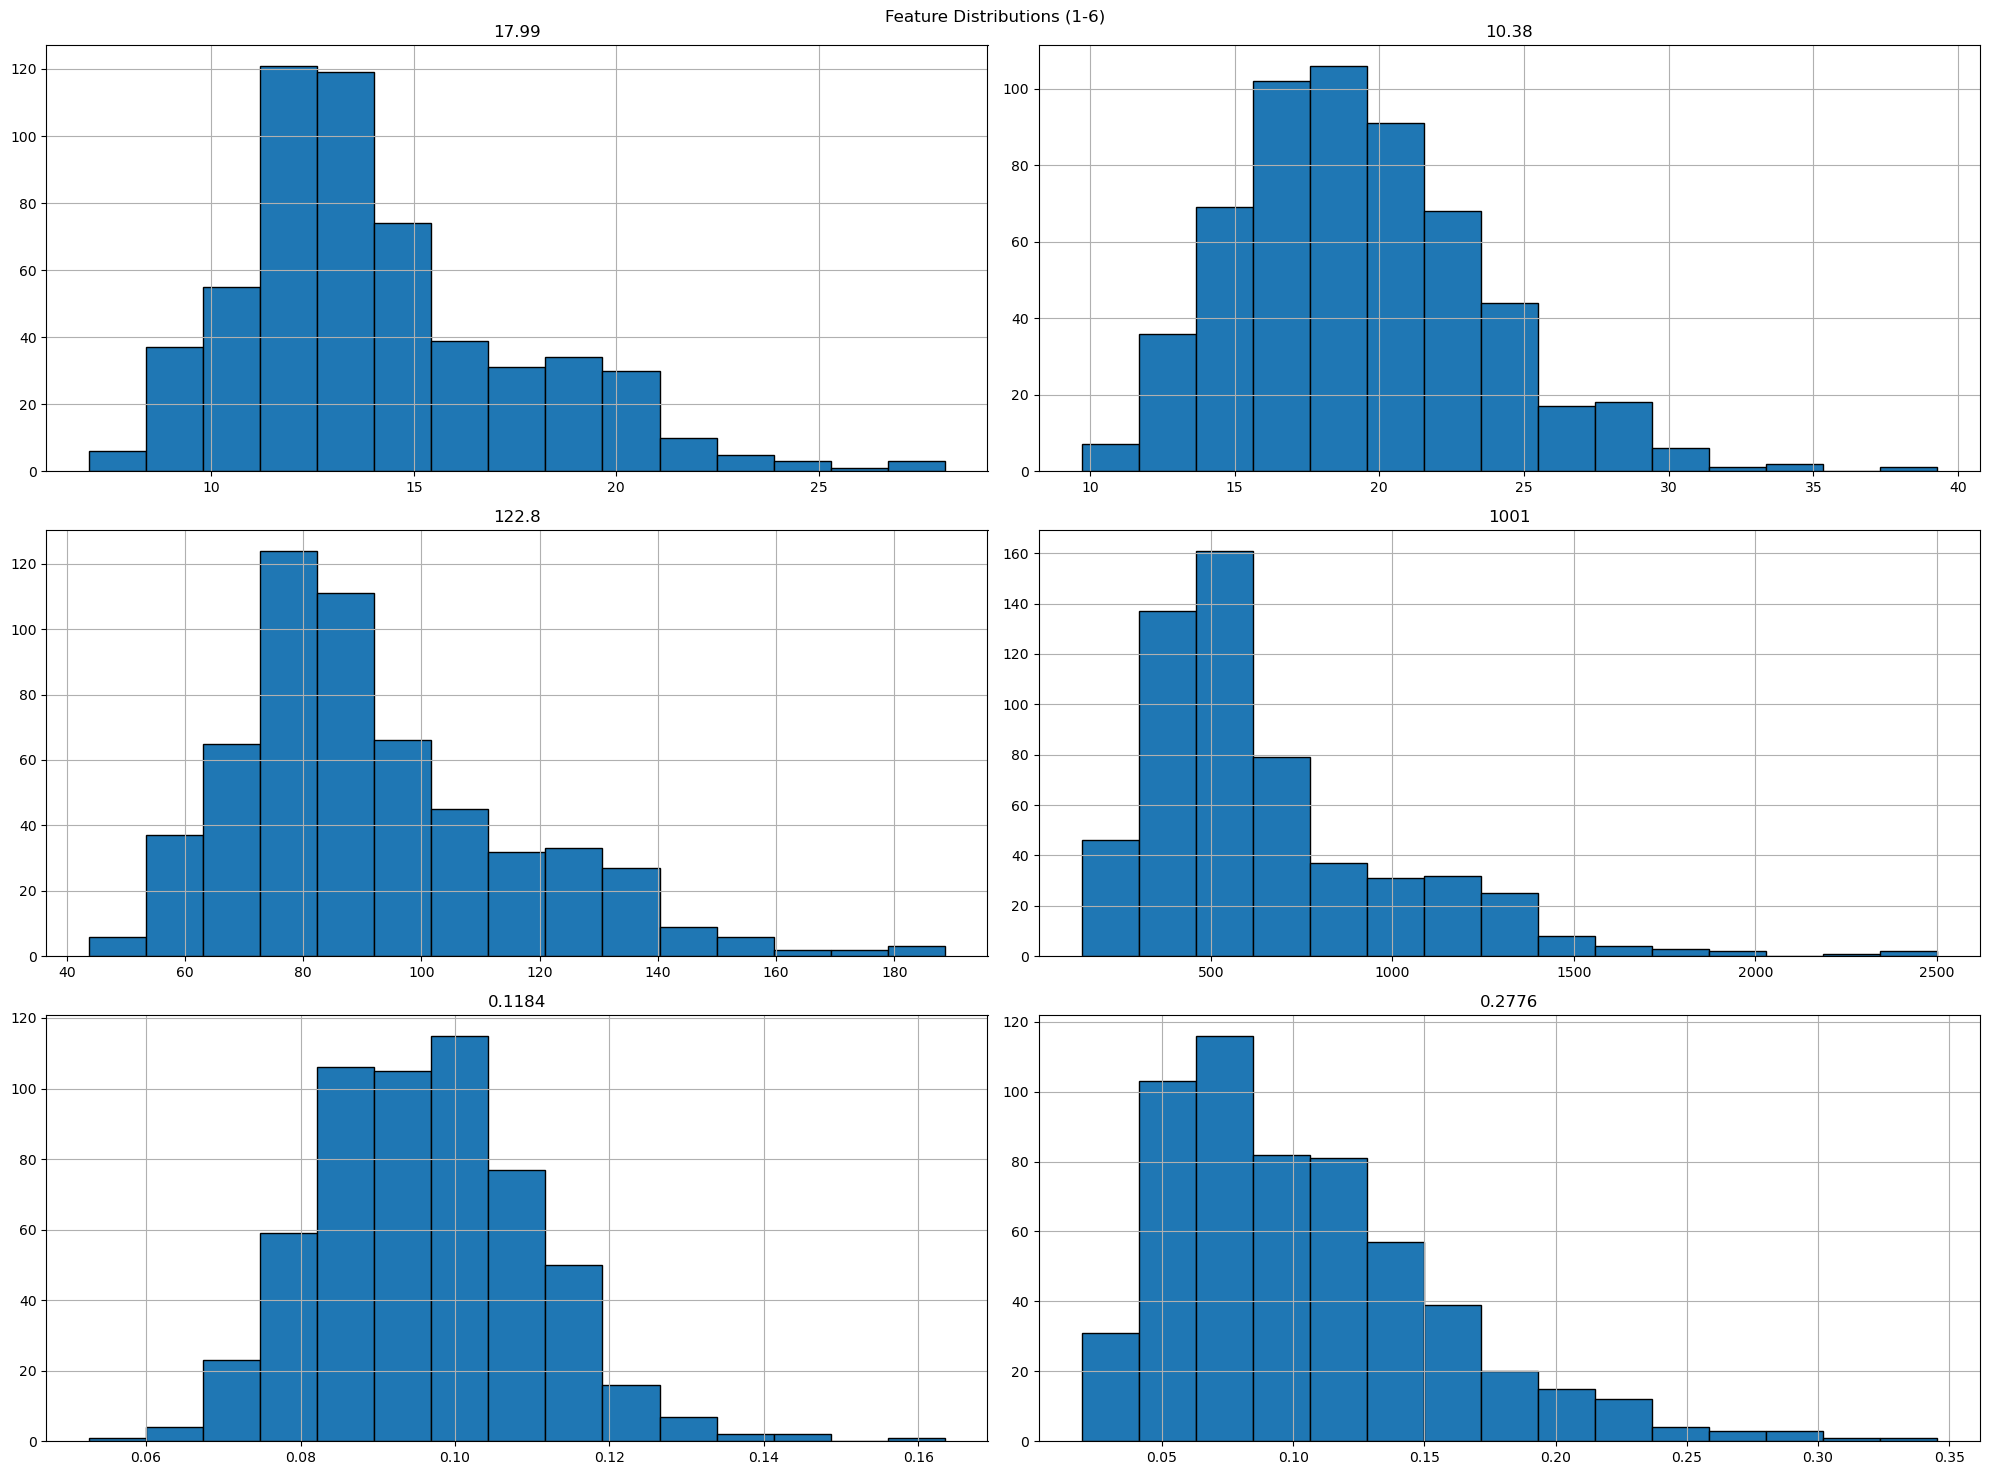

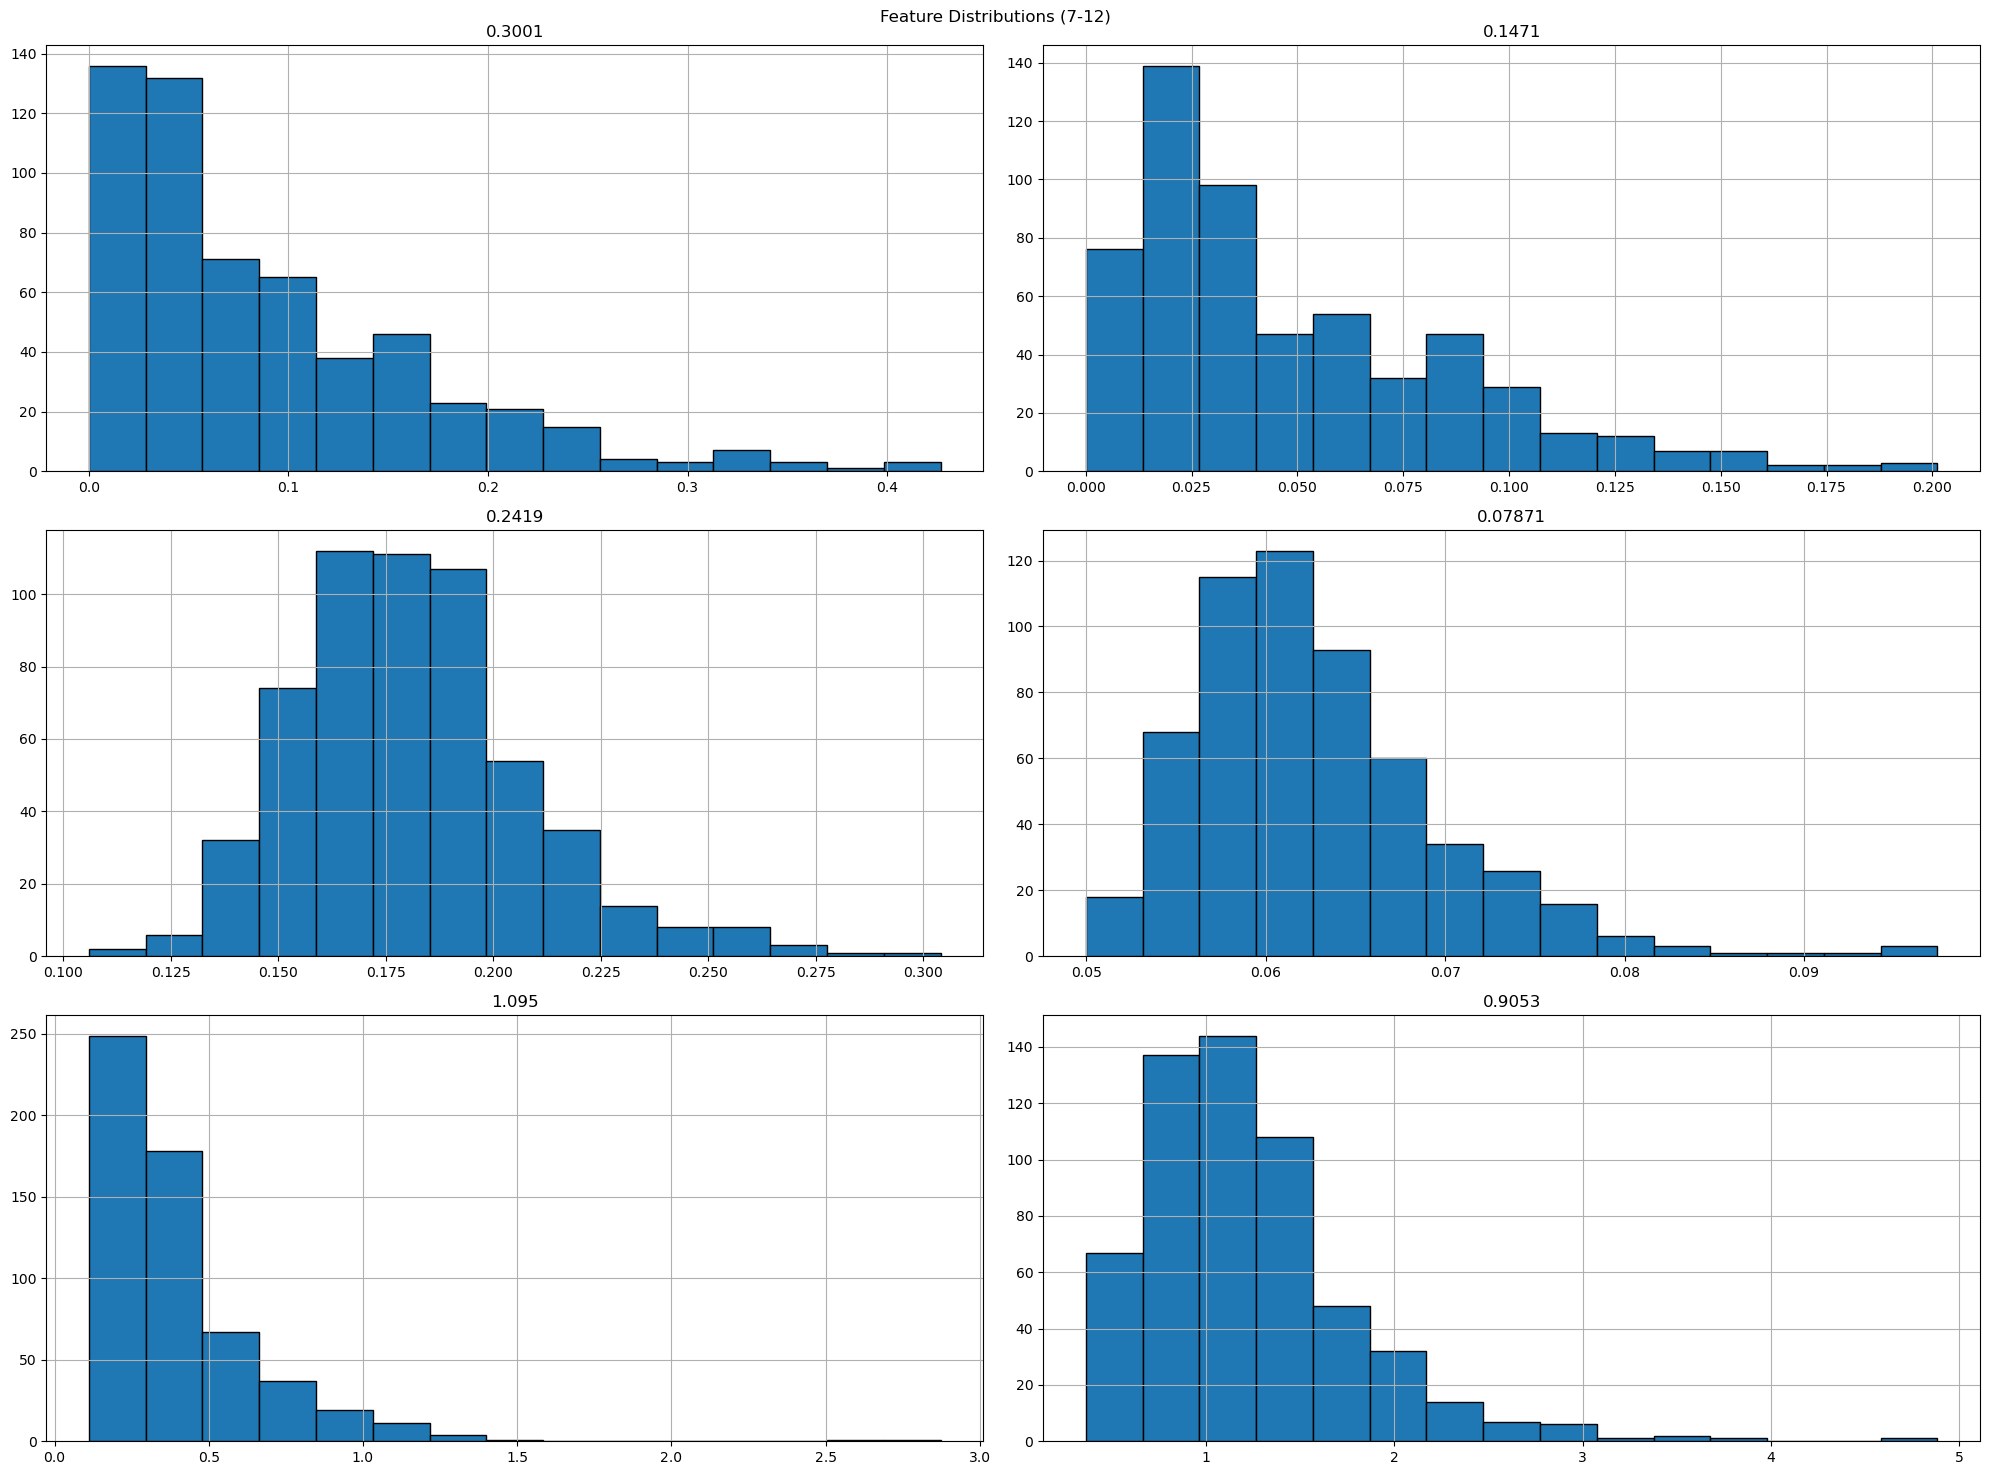

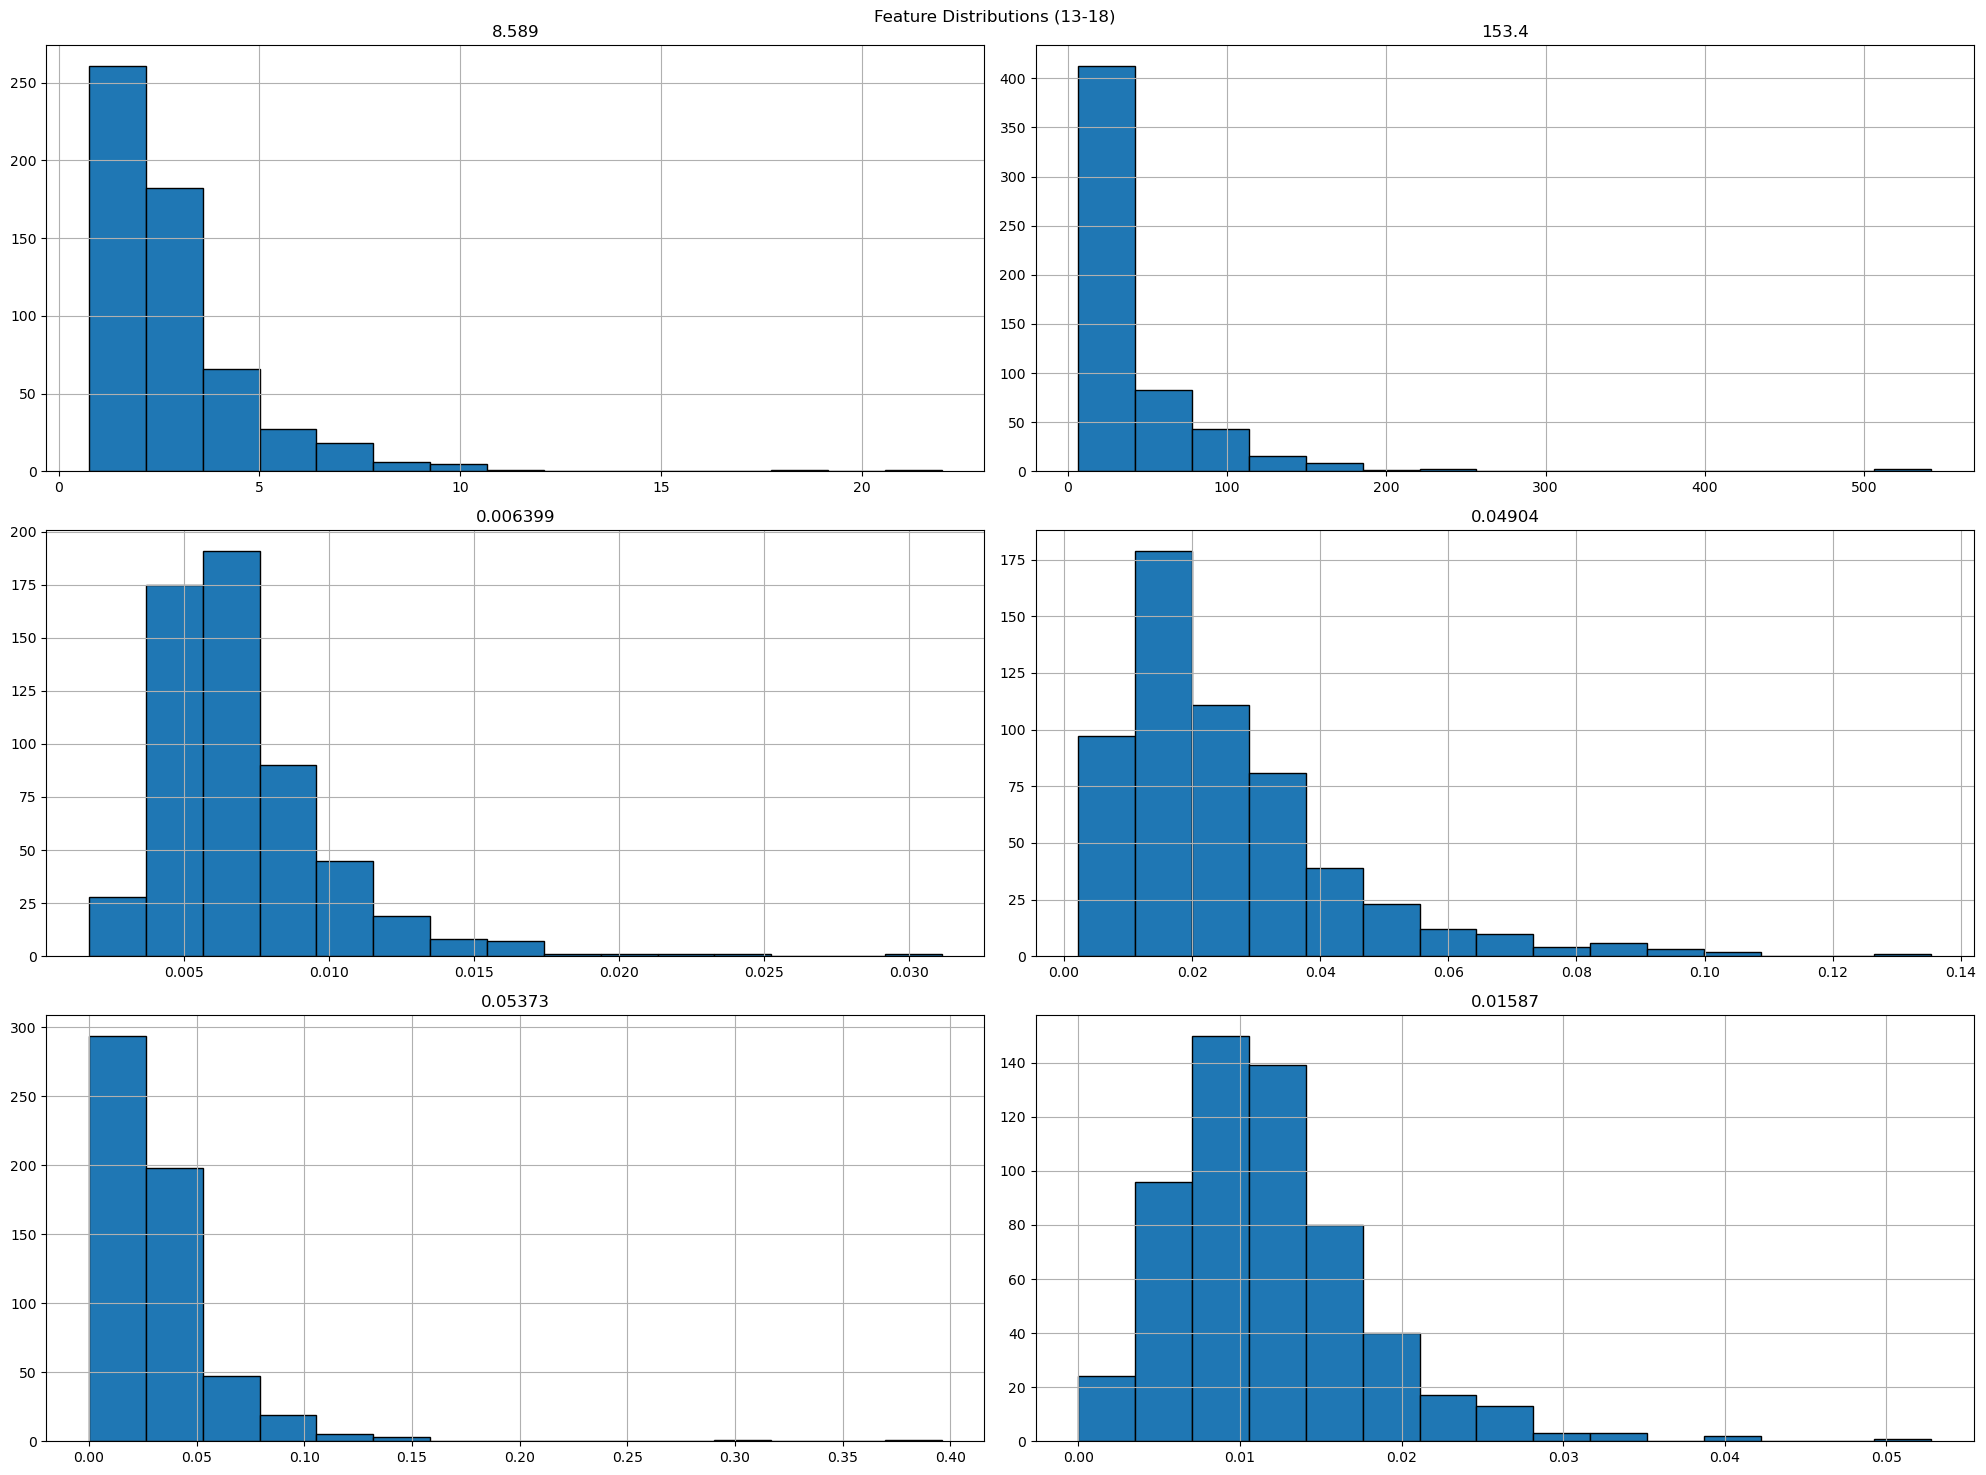

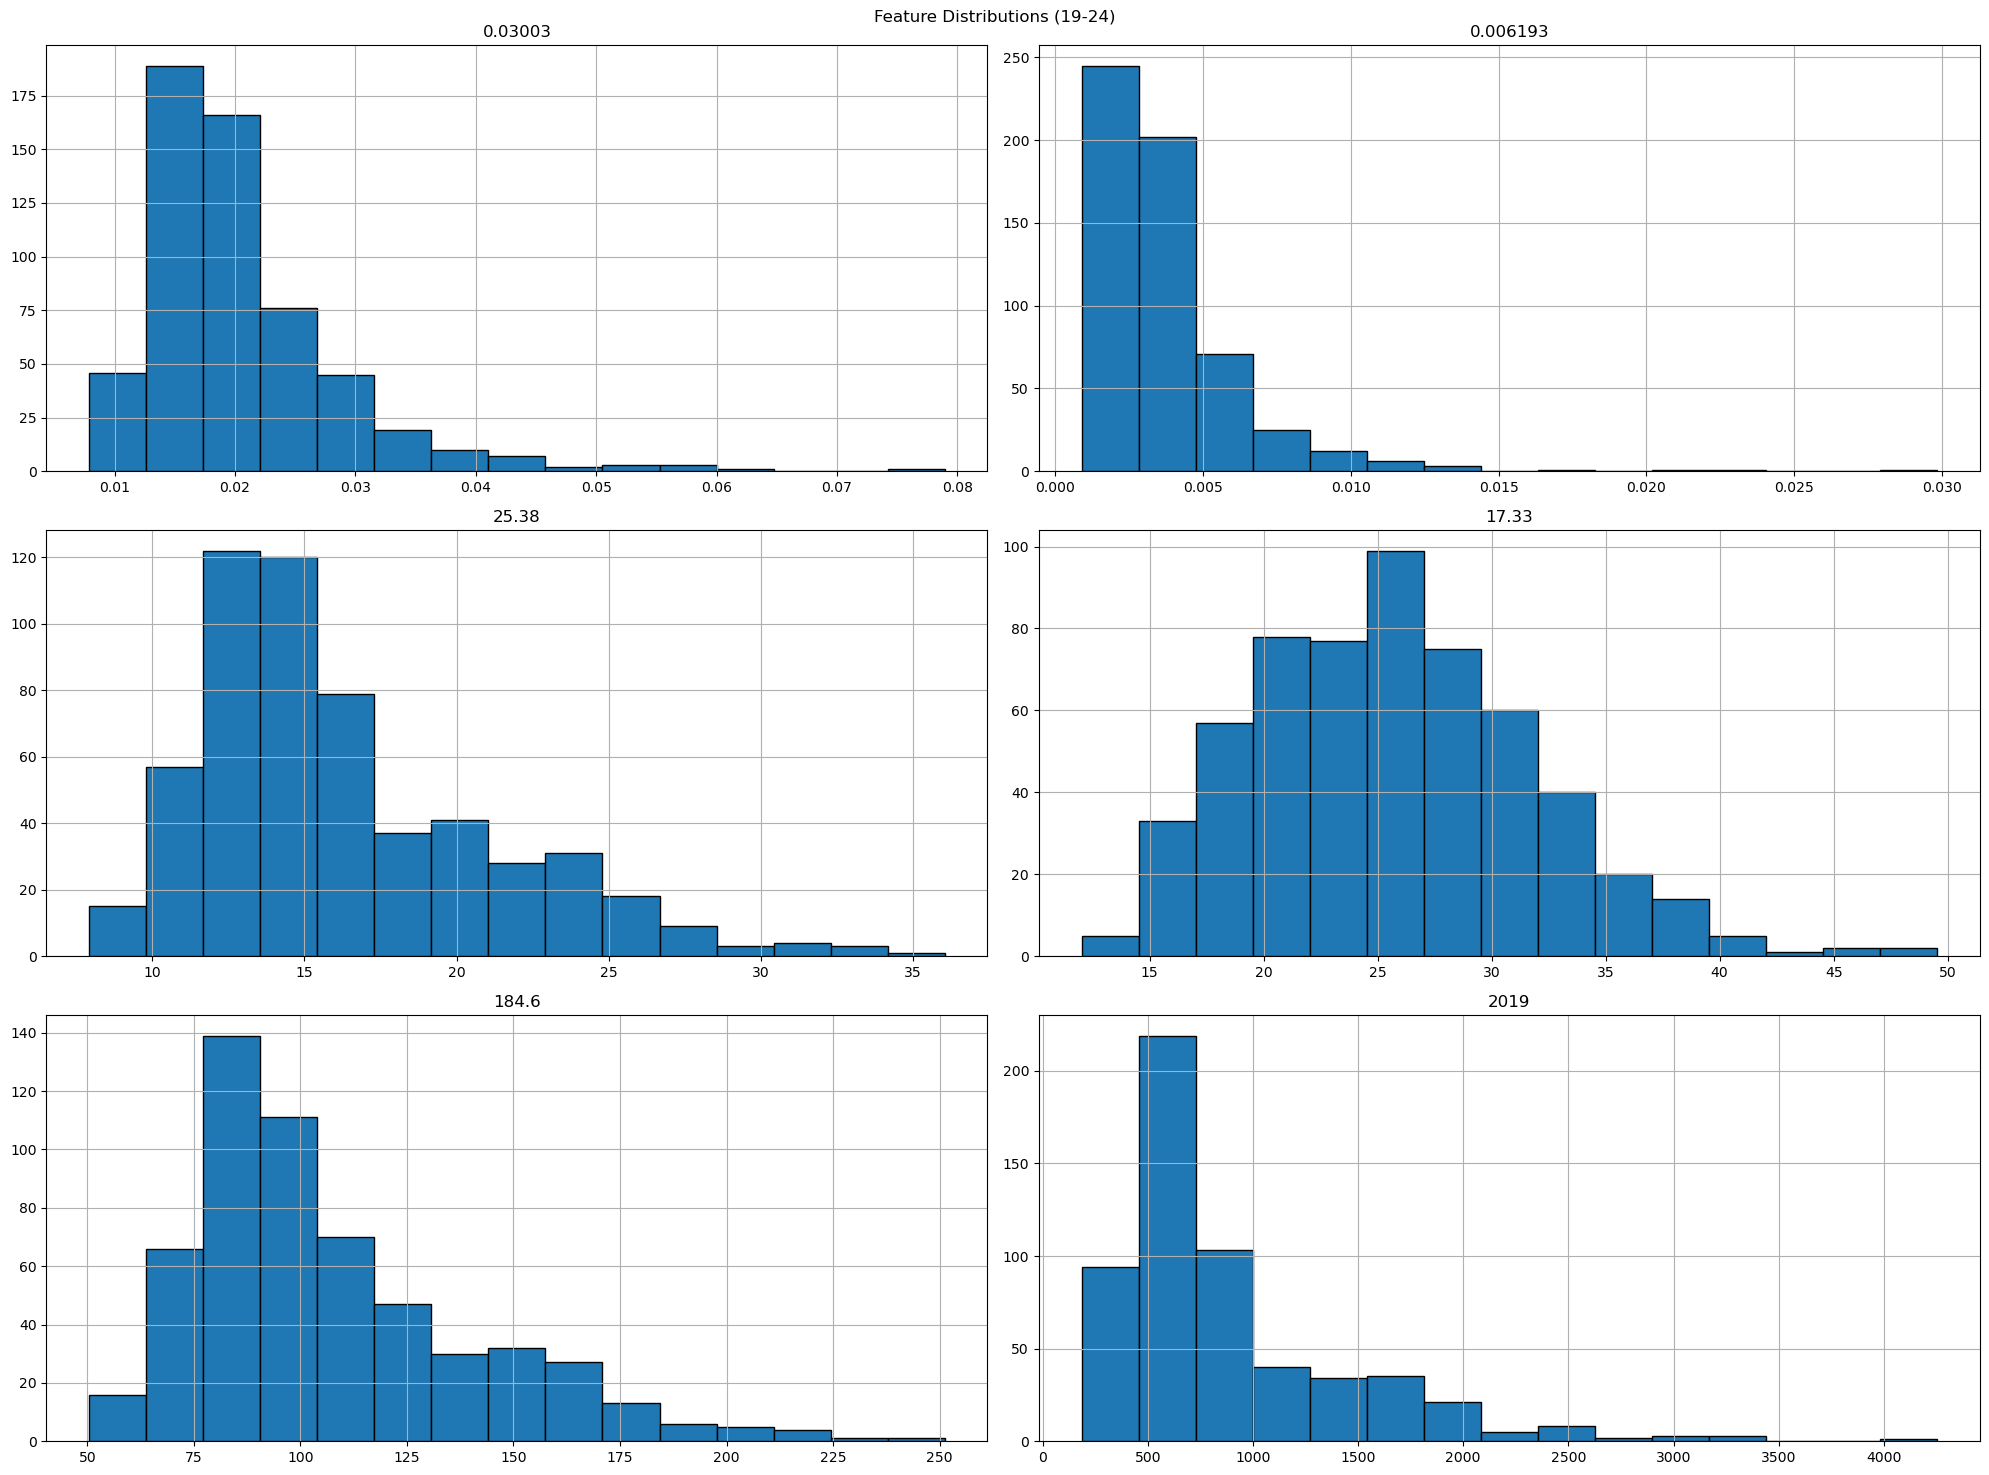

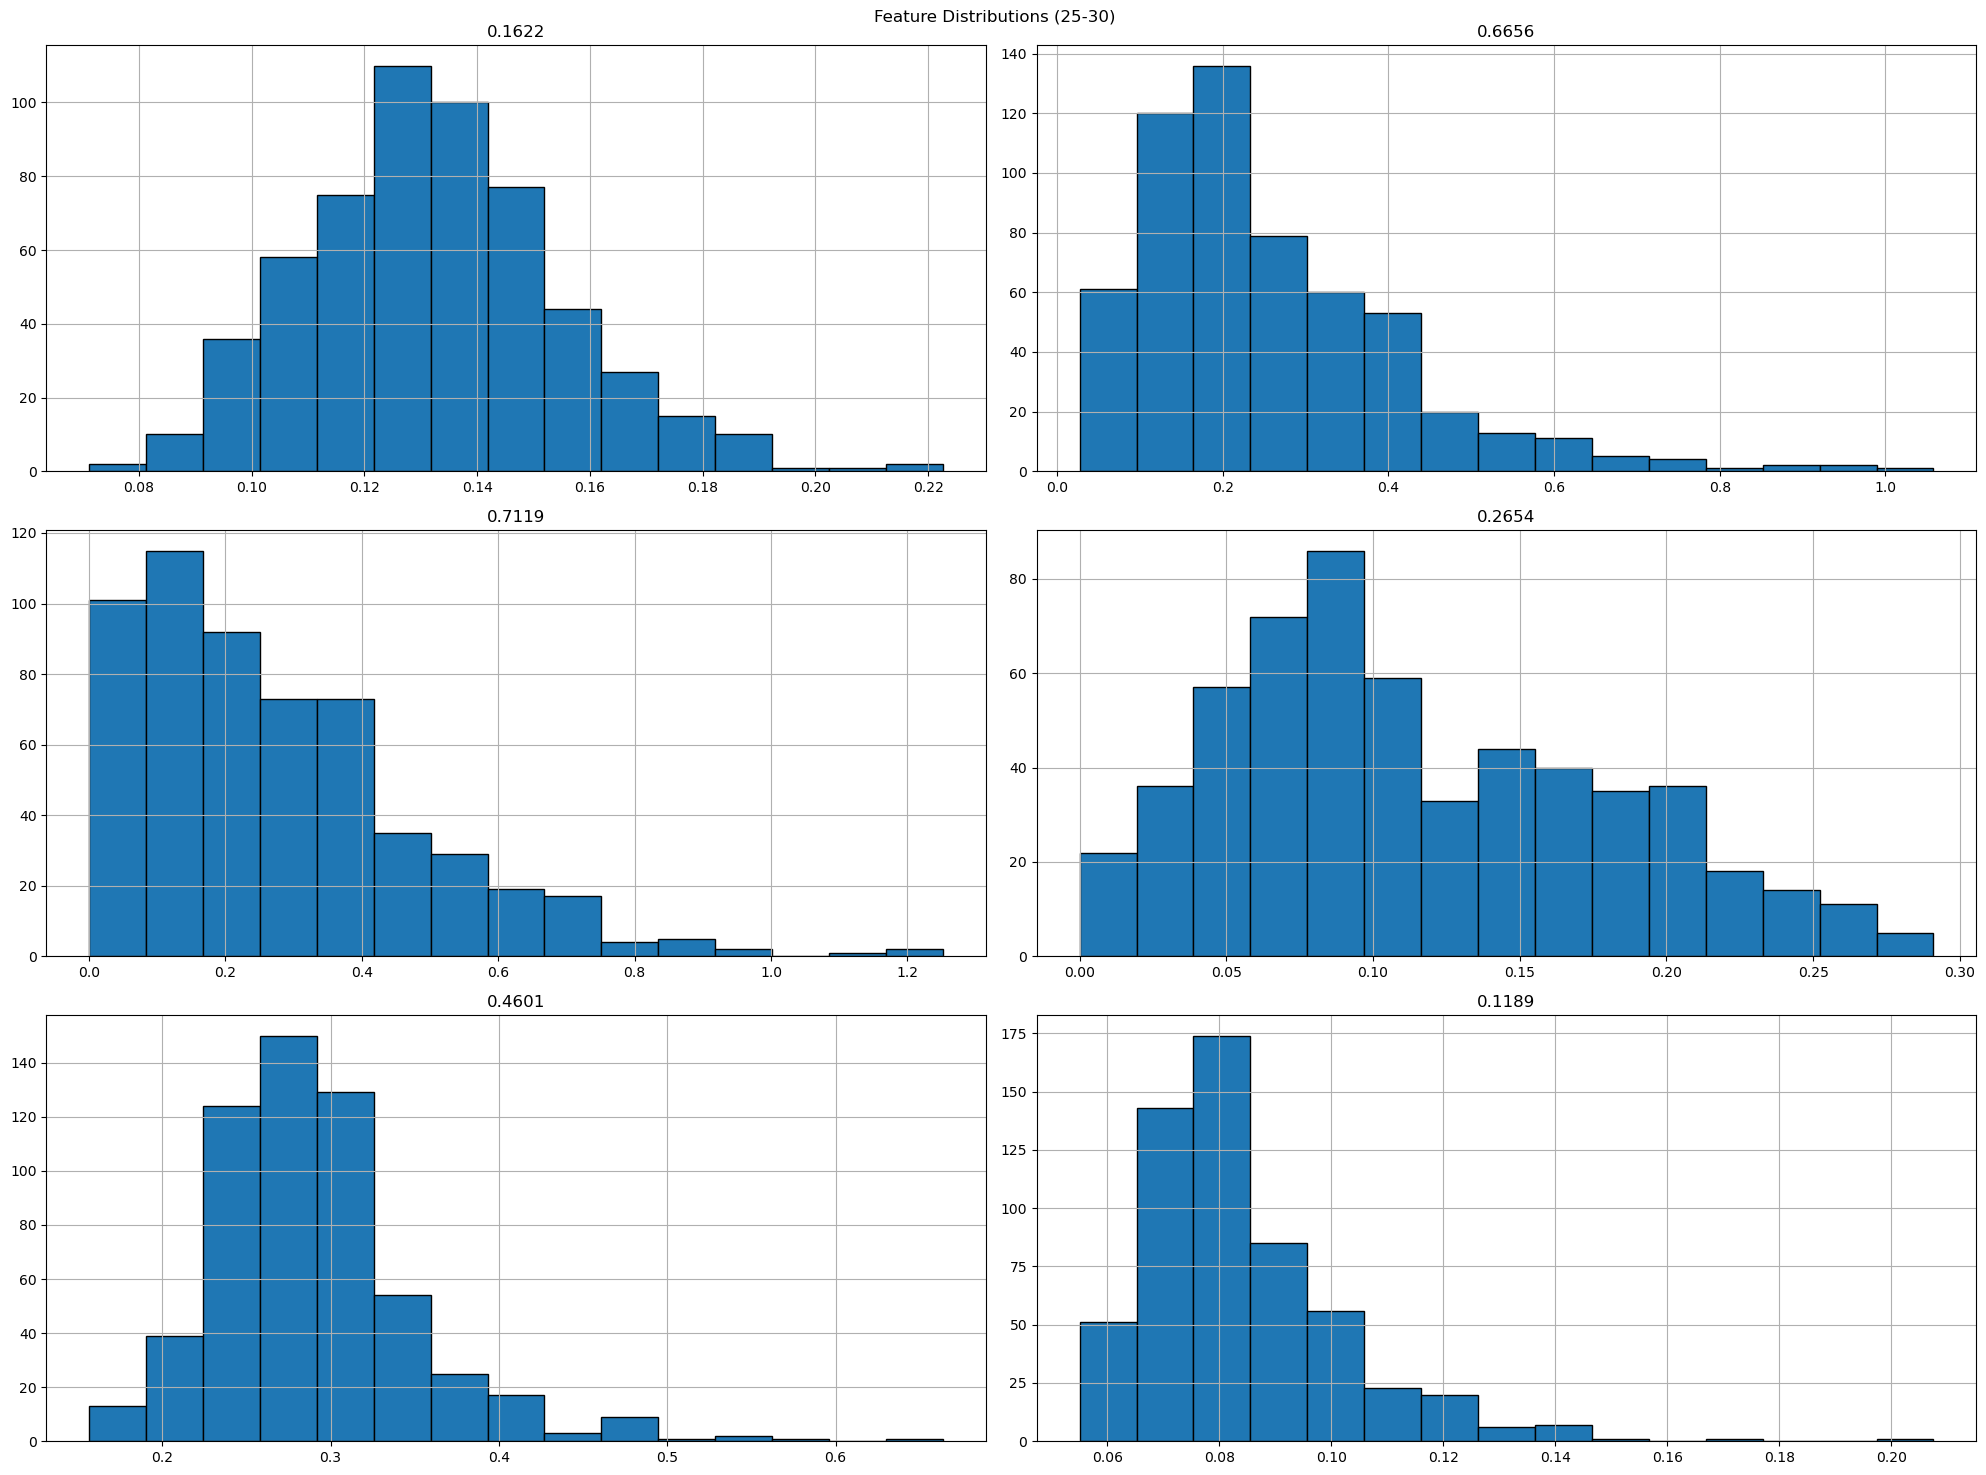

In [15]:
# Histograms of features
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
for i in range(0, len(num_cols), 6):  # Grouping features by 6 for better visibility
    data[num_cols[i:i+6]].hist(bins=15, figsize=(20, 15), layout=(3, 2), edgecolor='black')  # Simplifing the layout
    plt.suptitle(f"Feature Distributions ({i+1}-{min(i+6, len(num_cols))})")
    plt.tight_layout()  # Adjusting spacing
    plt.show()

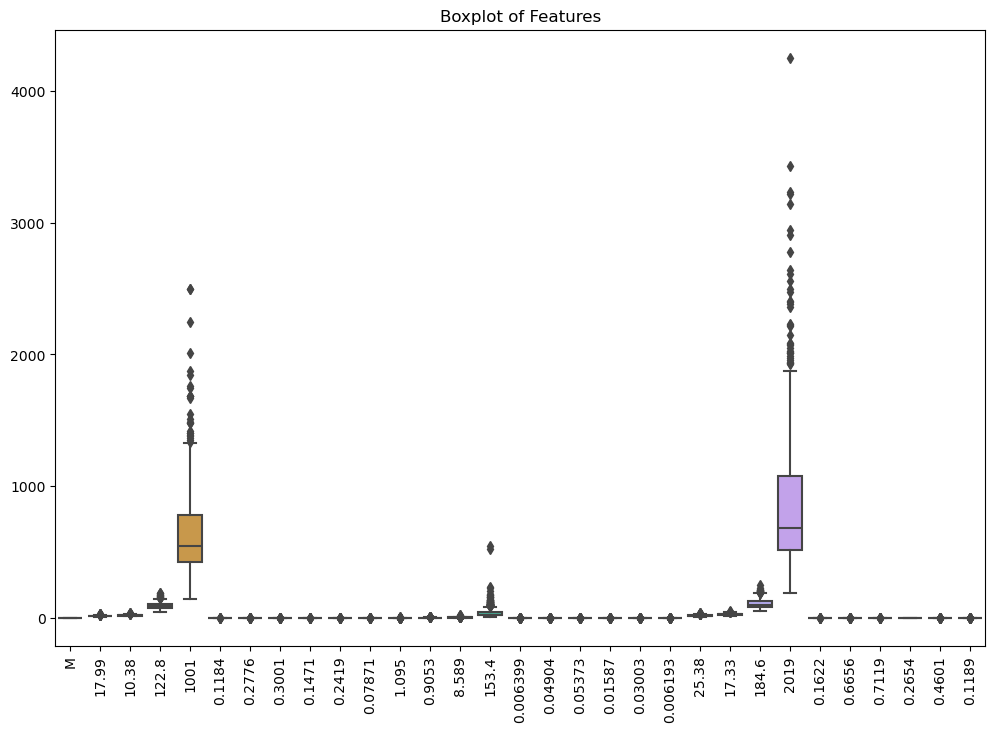

In [16]:
# Boxplots for features
plt.figure(figsize=(12, 8))
sns.boxplot(data=data)
plt.title("Boxplot of Features")
plt.xticks(rotation=90)
plt.show()

C:\Users\kazan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


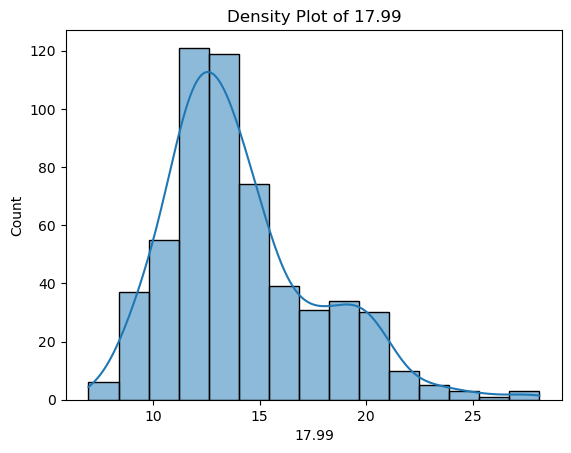

C:\Users\kazan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


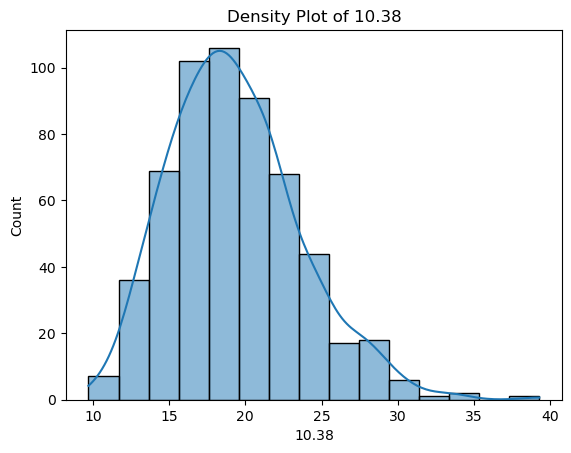

C:\Users\kazan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


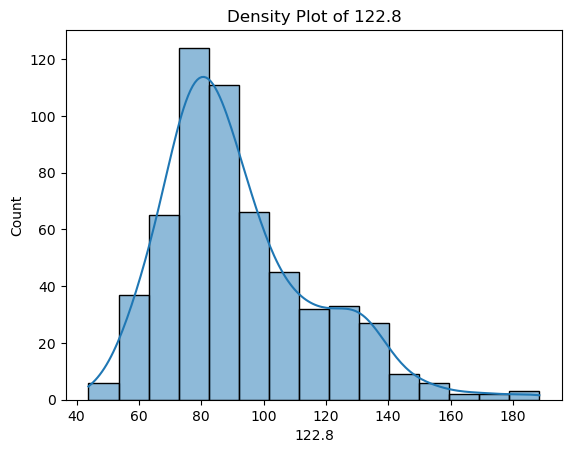

C:\Users\kazan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


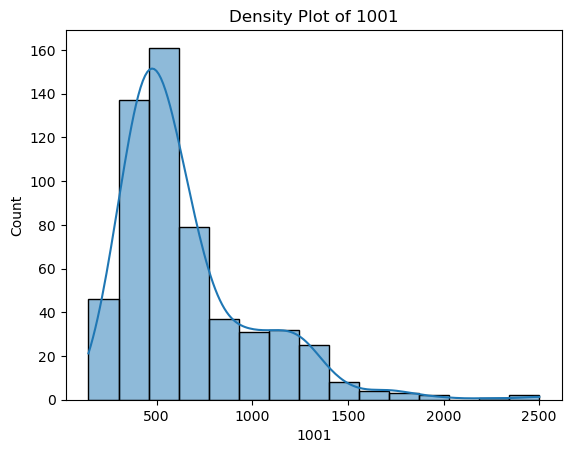

C:\Users\kazan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


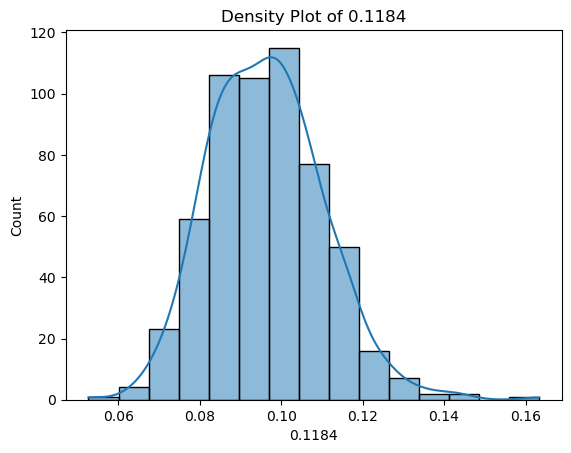

C:\Users\kazan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


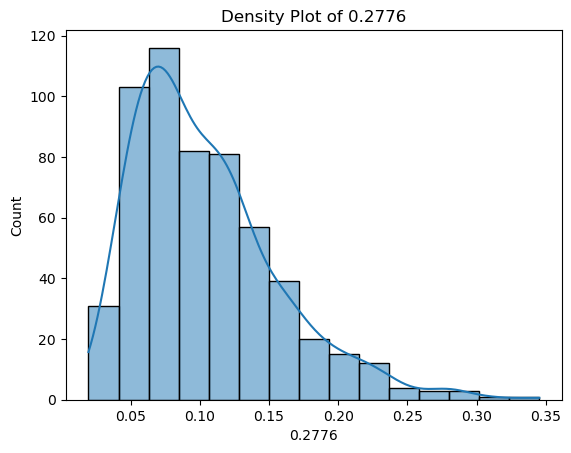

C:\Users\kazan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


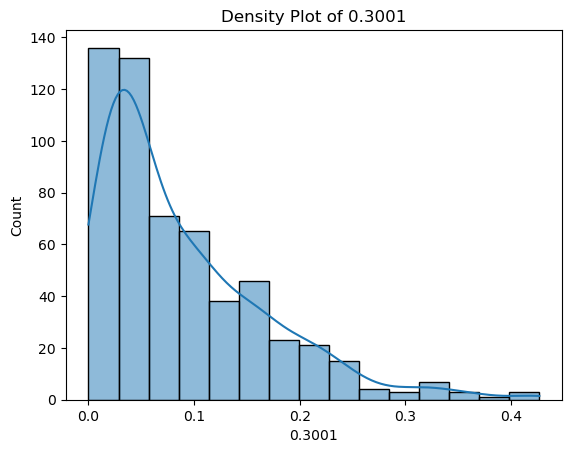

C:\Users\kazan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


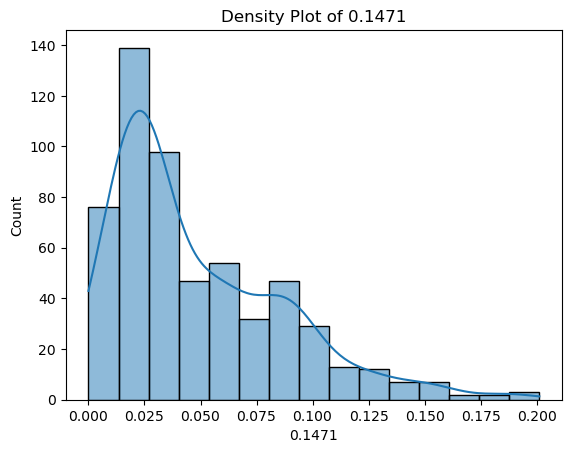

C:\Users\kazan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


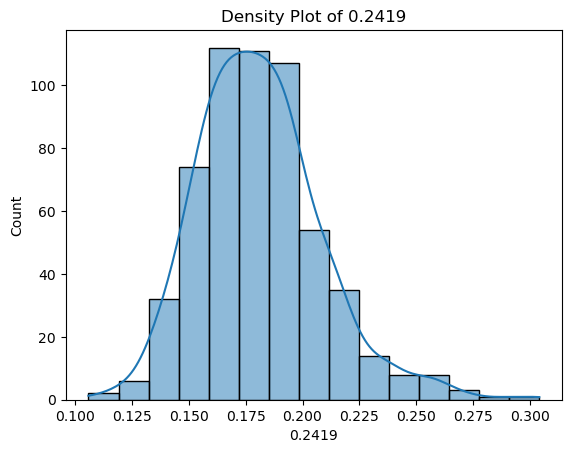

C:\Users\kazan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


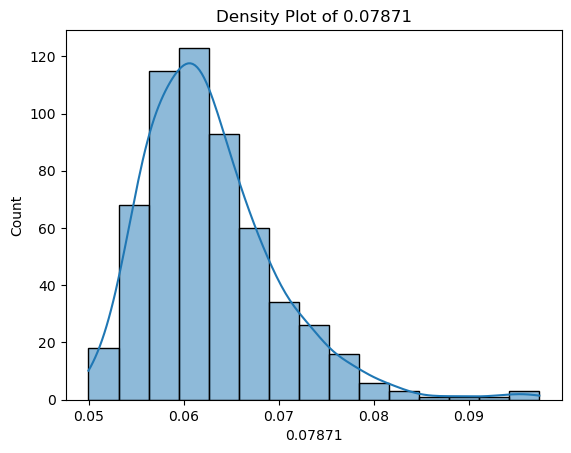

C:\Users\kazan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


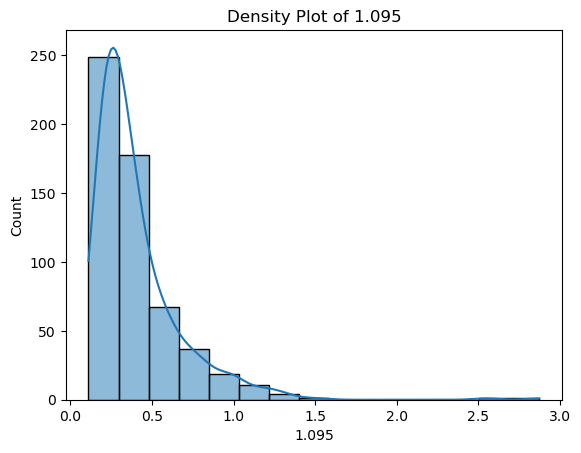

C:\Users\kazan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


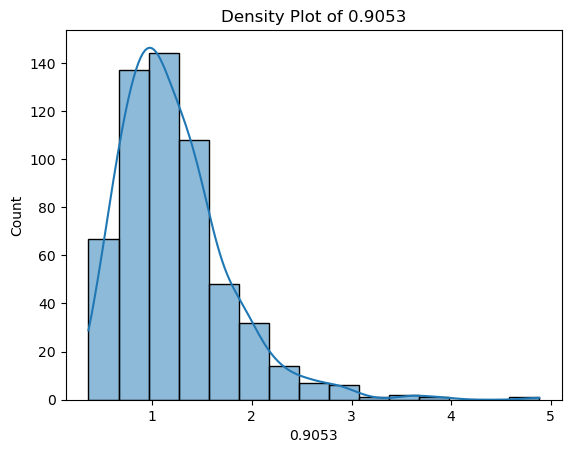

C:\Users\kazan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


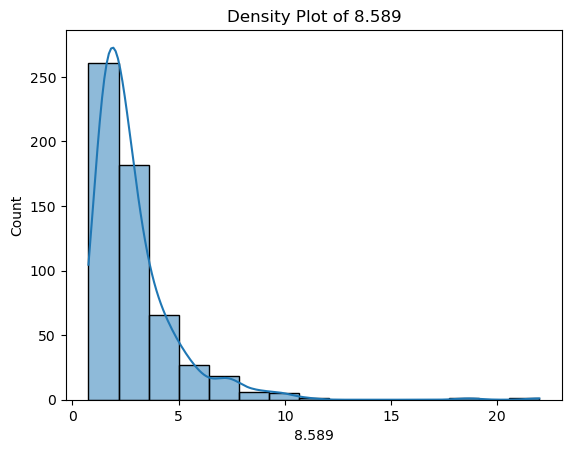

C:\Users\kazan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


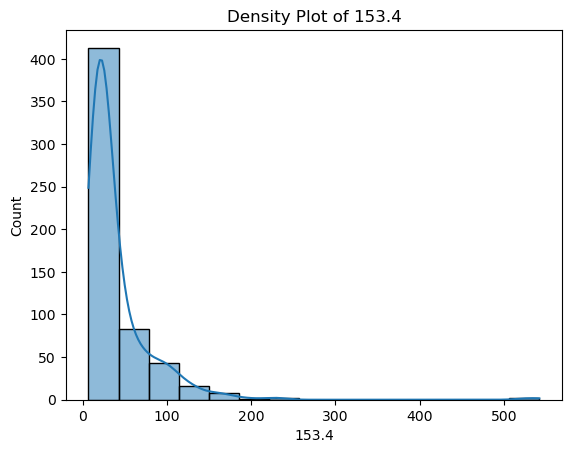

C:\Users\kazan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


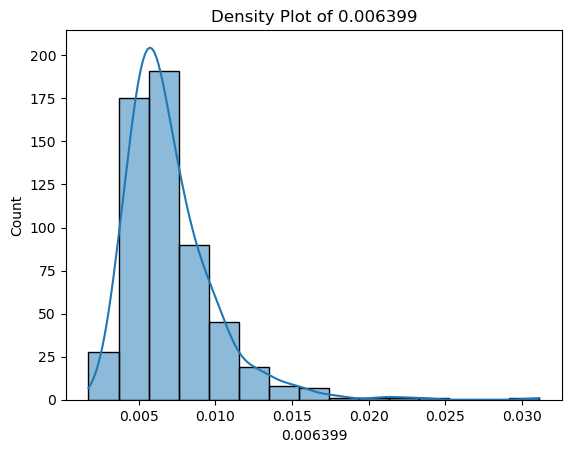

C:\Users\kazan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


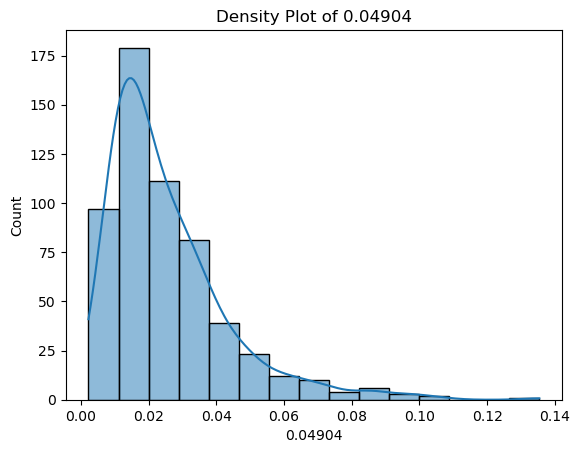

C:\Users\kazan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


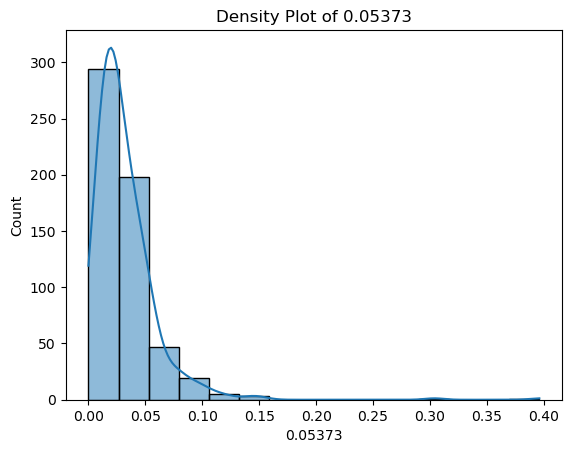

C:\Users\kazan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


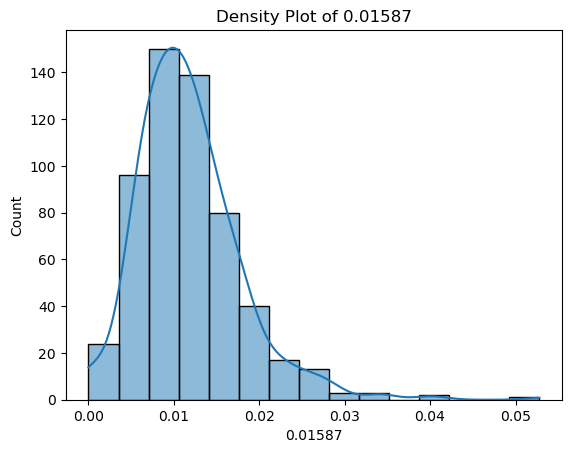

C:\Users\kazan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


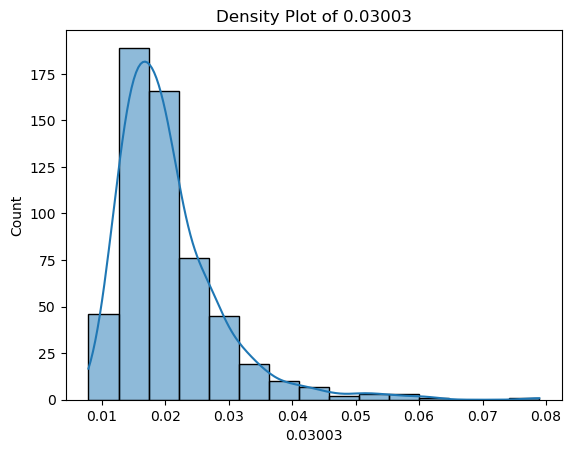

C:\Users\kazan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


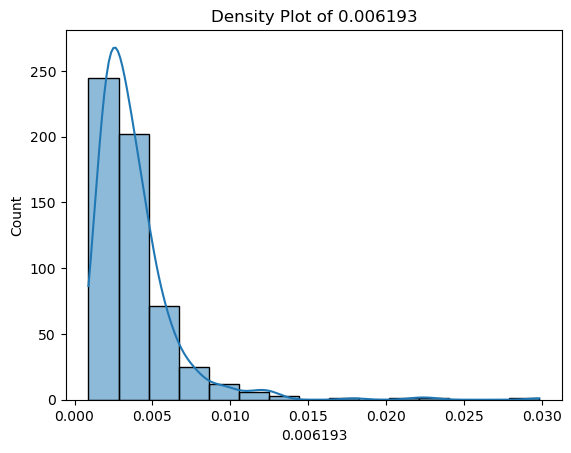

C:\Users\kazan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


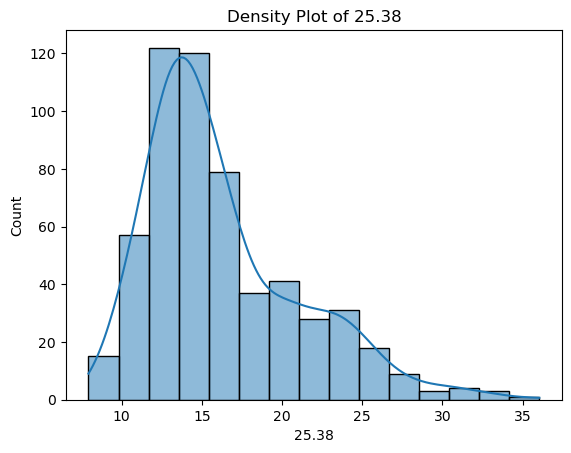

C:\Users\kazan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


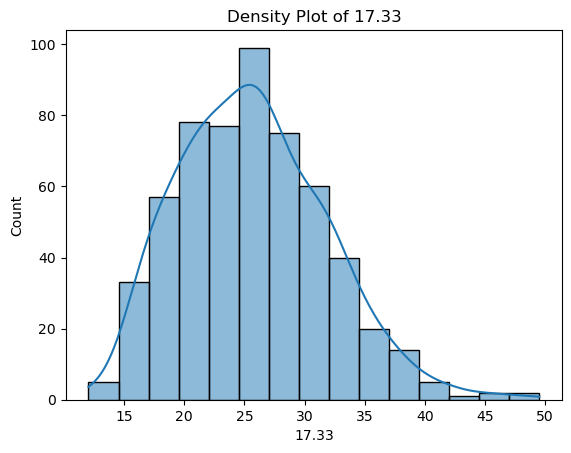

C:\Users\kazan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


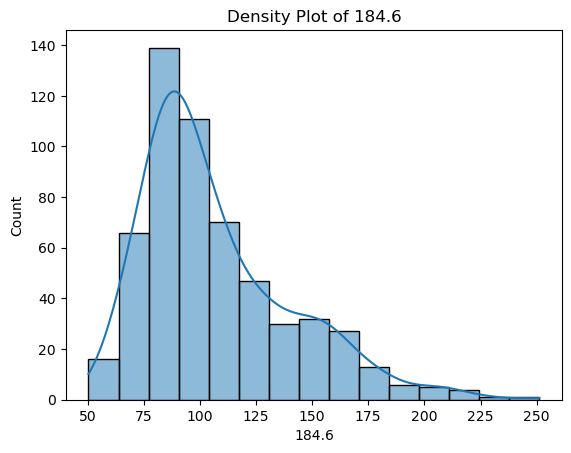

C:\Users\kazan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


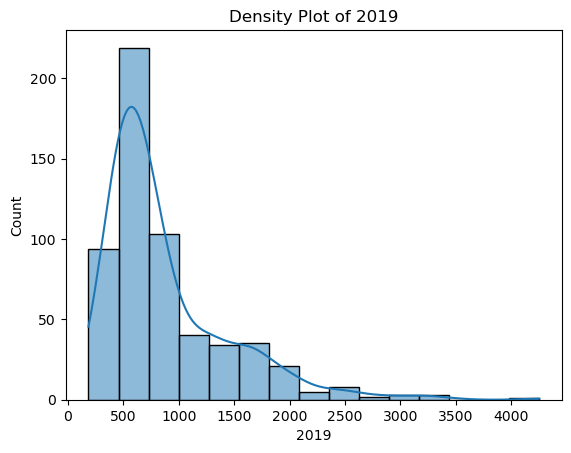

C:\Users\kazan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


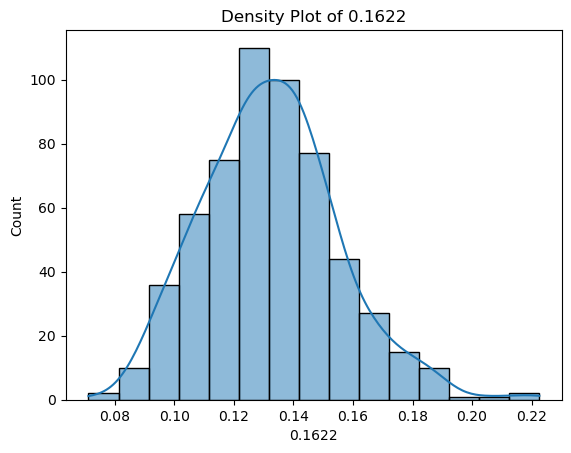

C:\Users\kazan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


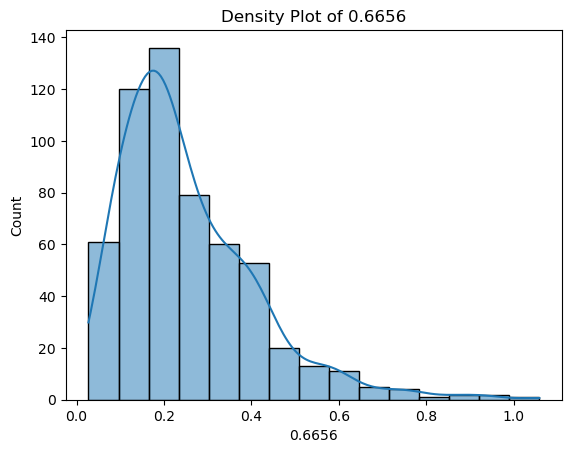

C:\Users\kazan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


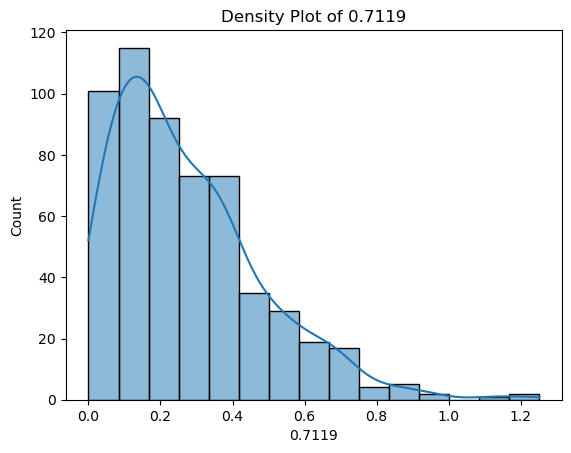

C:\Users\kazan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


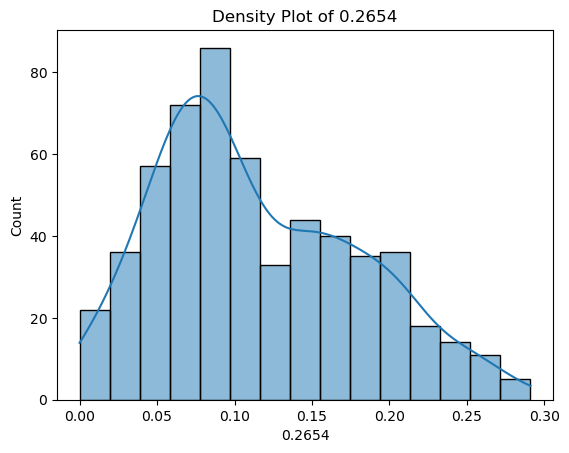

C:\Users\kazan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


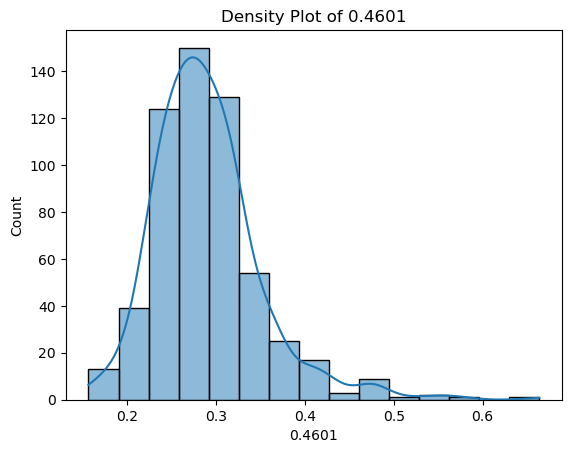

C:\Users\kazan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


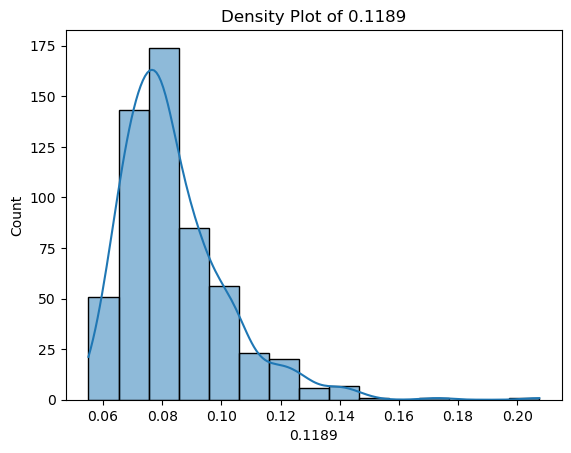

In [17]:
# Density plots for numerical variables
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure()
    sns.histplot(data[col], bins=15, kde=True)  # Using histplot with KDE
    plt.title(f"Density Plot of {col}")
    plt.show()

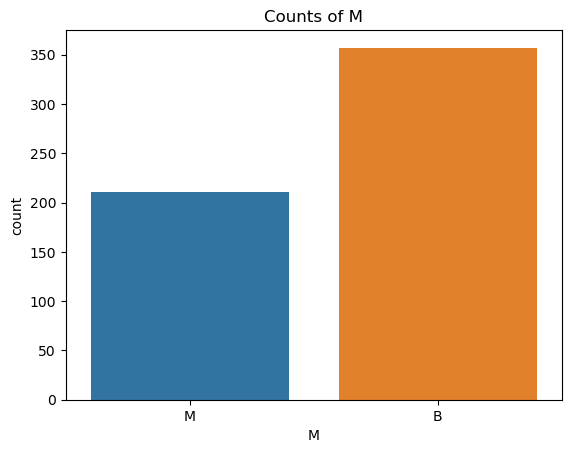

In [18]:
# Bar (Count) plots for categorical variables
for col in original_data.select_dtypes(include=['object']).columns:
    plt.figure()
    sns.countplot(x=col, data=original_data)
    plt.title(f'Counts of {col}')
    plt.show()

### Correlation matrix

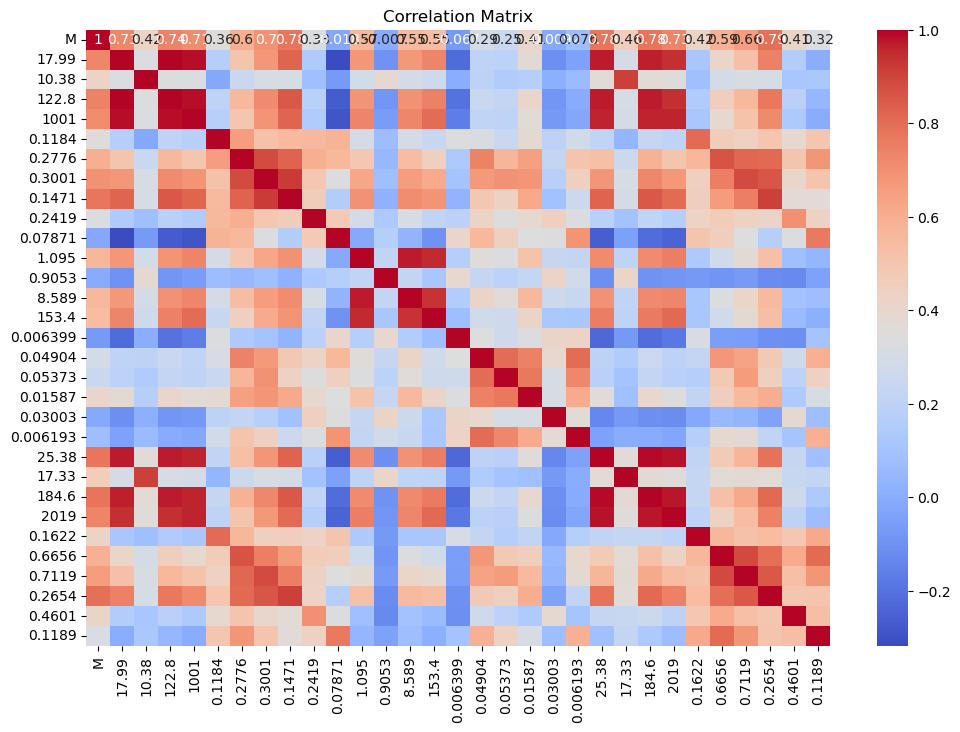

In [19]:
# Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### Feature Importatns

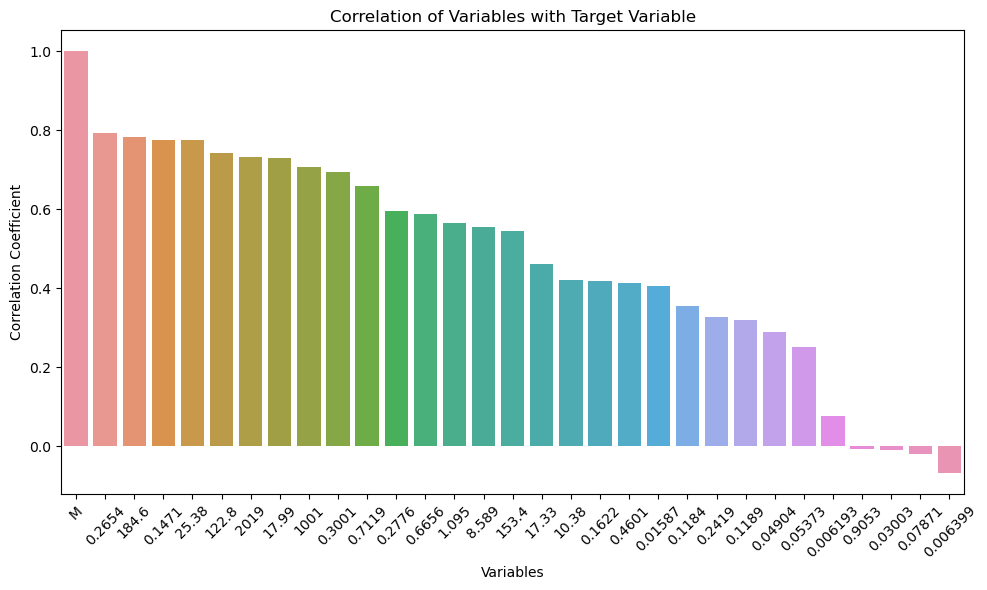


Correlation values with the target variable:
M           1.000000
0.2654      0.793181
184.6       0.782470
0.1471      0.776369
25.38       0.775725
122.8       0.741887
2019        0.732925
17.99       0.729376
1001        0.708389
0.3001      0.695648
0.7119      0.658348
0.2776      0.595587
0.6656      0.589453
1.095       0.565373
8.589       0.554416
153.4       0.546343
17.33       0.461443
10.38       0.422146
0.1622      0.419731
0.4601      0.413382
0.01587     0.407293
0.1184      0.356276
0.2419      0.327336
0.1189      0.320983
0.04904     0.290866
0.05373     0.252567
0.006193    0.076068
0.9053     -0.007024
0.03003    -0.009170
0.07871    -0.018099
0.006399   -0.066629
Name: M, dtype: float64


In [20]:
# Focusing on the correlation of variables with the target variable
plt.figure(figsize=(10, 6))
correlation_matrix = data.corr()
target_correlation = correlation_matrix.iloc[:, 0].sort_values(ascending=False)
sns.barplot(x=target_correlation.index, y=target_correlation.values)
plt.xticks(rotation=45)
plt.title('Correlation of Variables with Target Variable')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

# Displaying correlation values
print("\nCorrelation values with the target variable:")
print(target_correlation)

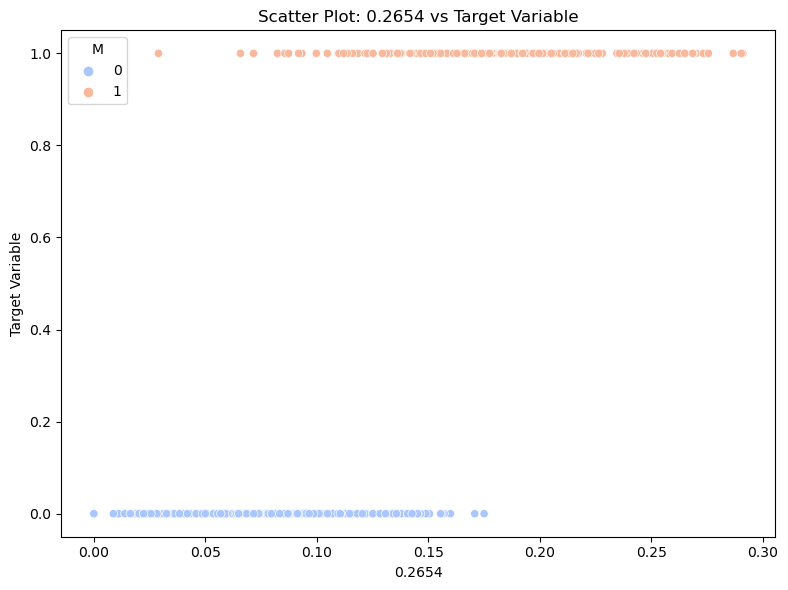

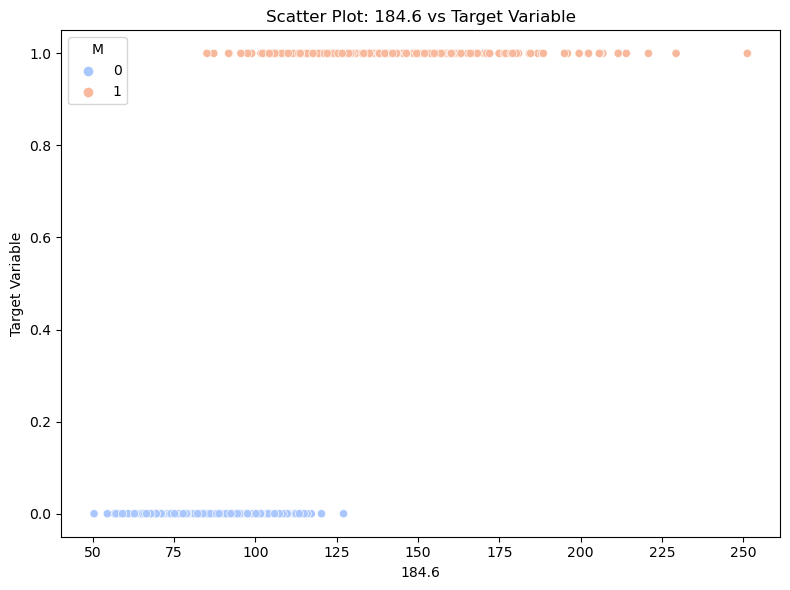

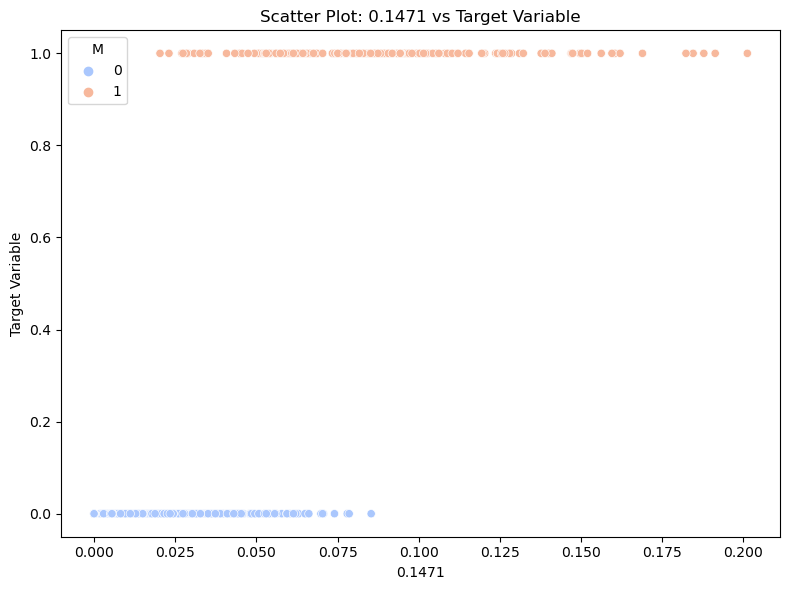

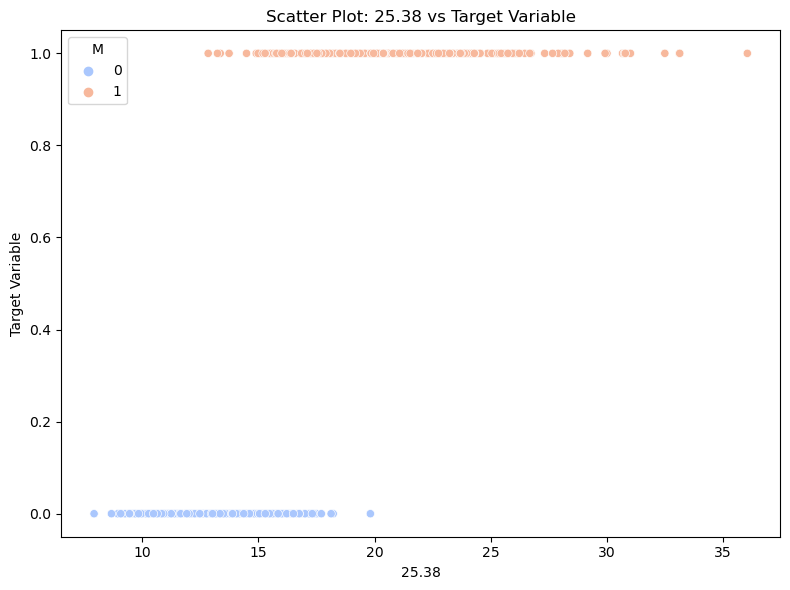

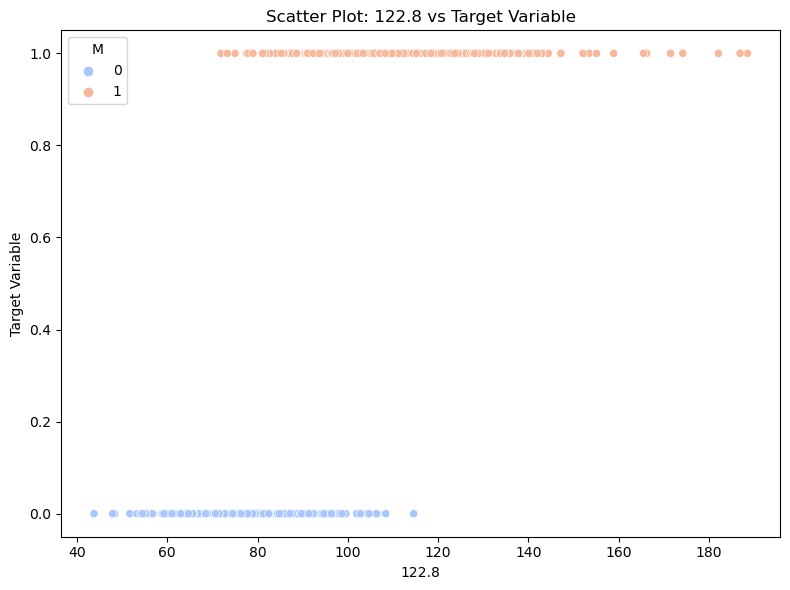

In [21]:
# Scatter plots for highly correlated features
high_corr_features = target_correlation.index[1:6]  # Select top 5 features excluding the target
for feature in high_corr_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[feature], y=data.iloc[:, 0], hue=data.iloc[:, 0], palette="coolwarm")
    plt.title(f'Scatter Plot: {feature} vs Target Variable')
    plt.xlabel(feature)
    plt.ylabel('Target Variable')
    plt.tight_layout()
    plt.show()

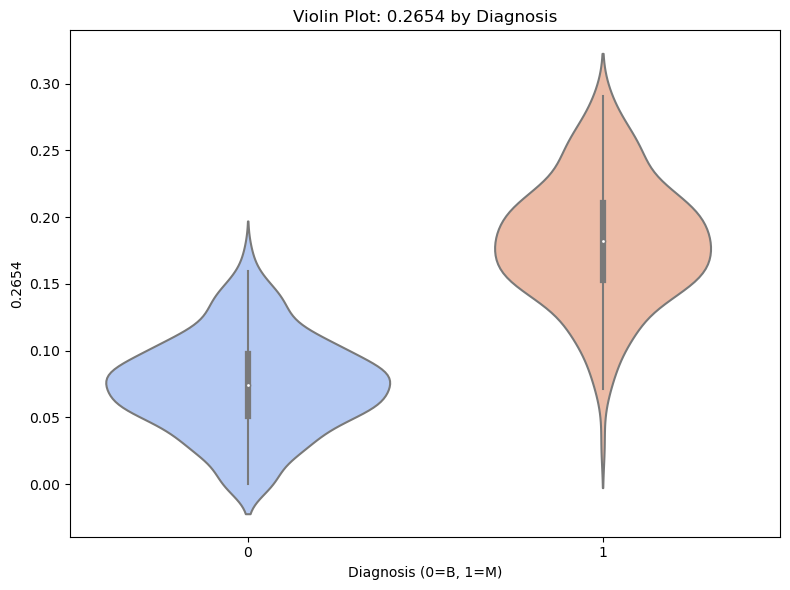

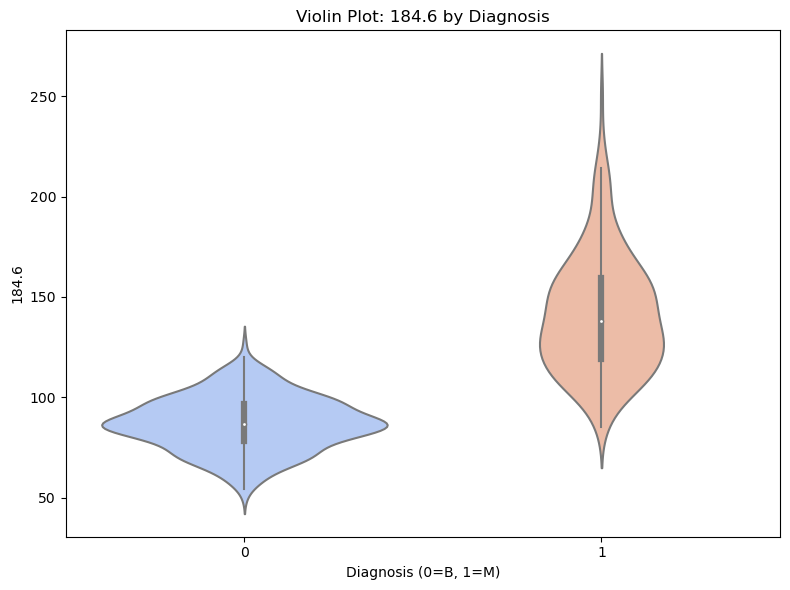

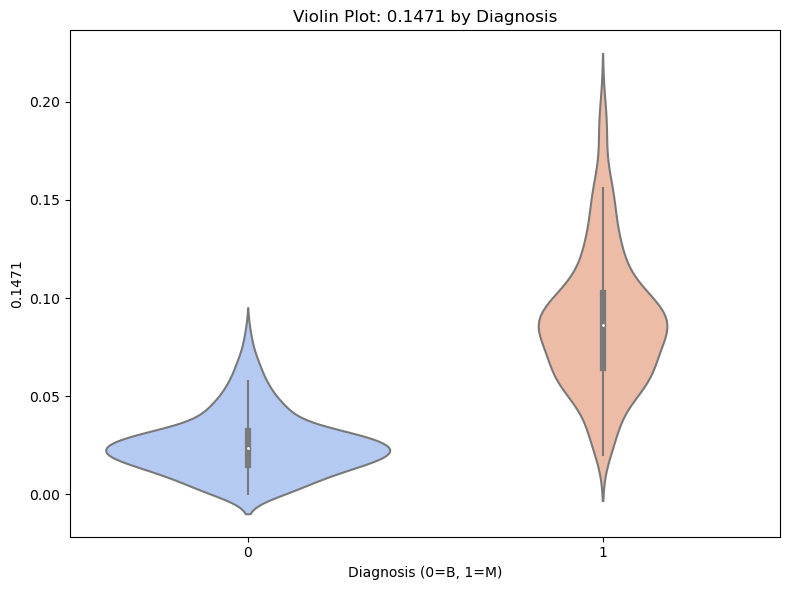

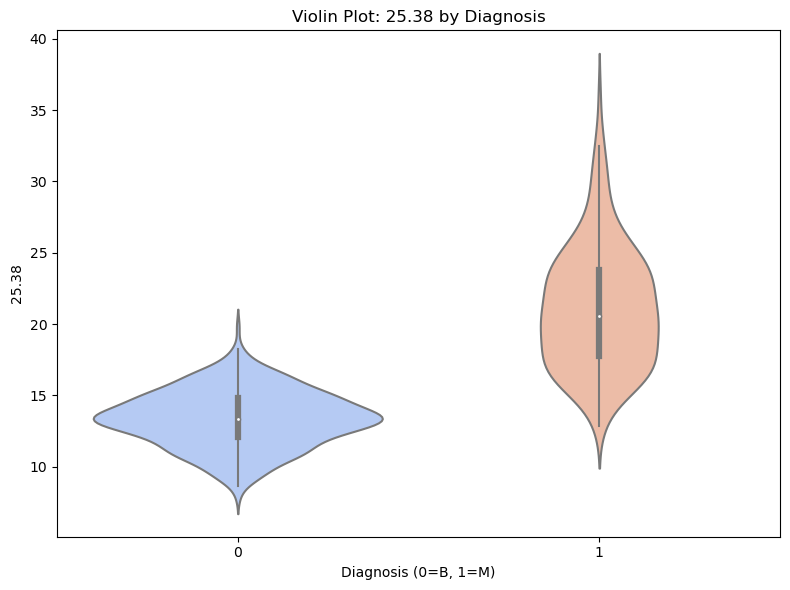

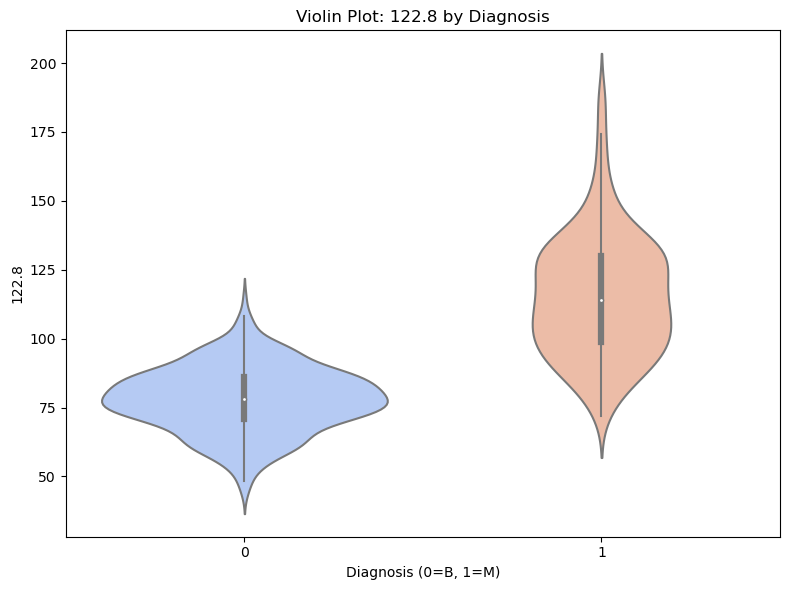

In [22]:
# Ploting violin plots for features with high correlation to the target variable
for feature in high_corr_features:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=data.iloc[:, 0], y=data[feature], palette="coolwarm")
    plt.title(f'Violin Plot: {feature} by Diagnosis')
    plt.xlabel('Diagnosis (0=B, 1=M)')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

In [23]:
# Printing the list of features that have a high correlation with the target variable
print(high_corr_features)

Index(['0.2654', '184.6', '0.1471', '25.38', '122.8'], dtype='object')


# Modeling

# Section 3: Modeling without  Standard Scalling

In [24]:
# Separating the features (X) and target variable (y) from the dataset without applying scaling
# X_no_scaling contains all feature columns
# y_no_scaling contains the target variable (Diagnosis: 0=B, 1=M)
X_no_scaling = data.iloc[:, 1:]
y_no_scaling = data.iloc[:, 0]

In [25]:
# Split the dataset into training and testing sets without scaling
X_train_no_scaling, X_test_no_scaling, y_train_no_scaling, y_test_no_scaling = train_test_split(X_no_scaling, y_no_scaling, test_size=0.2, random_state=42)

In [26]:
# Training a Random Forest model
print("\nTraining Random Forest without scaling...")
rf_model_no_scaling = RandomForestClassifier(random_state=42)
rf_model_no_scaling.fit(X_train_no_scaling, y_train_no_scaling)

# Evaluating the Random Forest model
y_pred_rf = rf_model_no_scaling.predict(X_test_no_scaling)
print("\nClassification Report for Random Forest without scaling:")
print(classification_report(y_test_no_scaling, y_pred_rf))


Training Random Forest without scaling...

Classification Report for Random Forest without scaling:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        68
           1       1.00      0.93      0.97        46

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



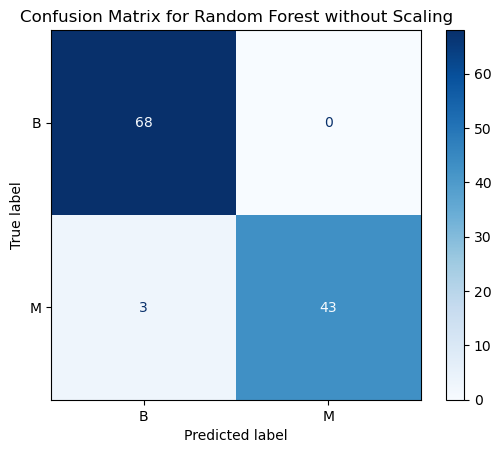

In [27]:
# Confusion Matrix for Random Forest without scaaling
cm_rf = confusion_matrix(y_test_no_scaling, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["B", "M"])
disp_rf.plot(cmap='Blues')
plt.title("Confusion Matrix for Random Forest without Scaling")
plt.show()

### Performing cross-validation without scaling


Cross-Validation Results without Scaling:
               Mean Accuracy  Standard Deviation
Random Forest       0.951526            0.019204
XGBoost             0.962540            0.016487
Perceptron          0.861294            0.057864


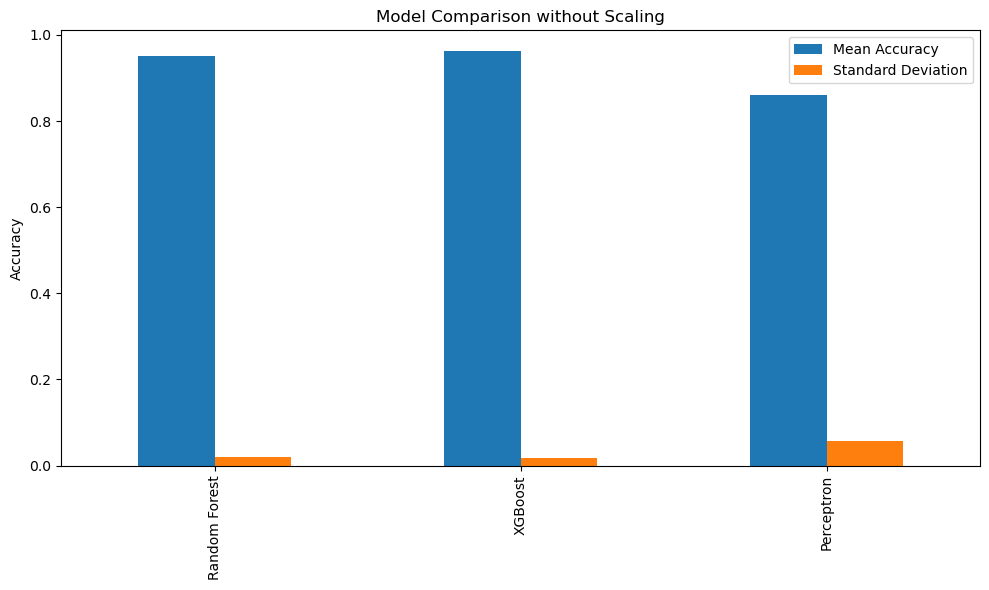

In [28]:
# Defining models
models_no_scaling = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "Perceptron": Perceptron(random_state=42, max_iter=1000, tol=1e-3)
}

cv_results_no_scaling = {}

# Performing cross-validation
for name, model in models_no_scaling.items():
    scores = cross_val_score(model, X_train_no_scaling, y_train_no_scaling, cv=5, scoring='accuracy', n_jobs=-1)
    cv_results_no_scaling[name] = {
        "Mean Accuracy": scores.mean(),
        "Standard Deviation": scores.std()
    }

# Converting results to DataFrame for better visualization
cv_results_no_scaling_df = pd.DataFrame(cv_results_no_scaling).T

# Printing the results
print("\nCross-Validation Results without Scaling:")
print(cv_results_no_scaling_df)

# Ploting cross-validation results
cv_results_no_scaling_df.plot(kind='bar', figsize=(10, 6), title="Model Comparison without Scaling")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

# Section 4: Model Training and Evaluation on Scaled Full Dataset

In [29]:
# Scaling the features using StandardScaler
# X contains all feature columns
# y contains the target variable (Diagnosis: 0=B, 1=M)
# X_scaled is the scaled version of the features, where each feature has a mean of 0 and standard deviation of 1
scaler = StandardScaler()
X = data.iloc[:, 1:]
y = data.iloc[:, 0]
X_scaled = scaler.fit_transform(X)

In [30]:
# Displaying Scaled arrays
X_scaled

array([[ 1.83208378, -0.35832707,  1.68910604, ...,  1.09526221,
        -0.24044363,  0.28529387],
       [ 1.58210603,  0.45385958,  1.56958968, ...,  1.96646779,
         1.16385786,  0.2053006 ],
       [-0.76711673,  0.25081292, -0.59077158, ...,  2.18809026,
         6.08623563,  4.95045676],
       ...,
       [ 0.70434323,  2.04789258,  0.6752776 , ...,  0.41969578,
        -1.10613122, -0.31576665],
       [ 1.84060575,  2.33962629,  1.98583632, ...,  2.30272257,
         1.93516598,  2.22846365],
       [-1.80679694,  1.22170271, -1.81313547, ..., -1.74761915,
        -0.04354852, -0.74961903]])

In [31]:
# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Training the Random Forest model on Scaled Full Dataset

In [32]:
# Training the Random Forest model on Scaled Full Dataset
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluating the model
y_pred = rf_model.predict(X_test)
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred))


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        68
           1       0.98      0.93      0.96        46

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



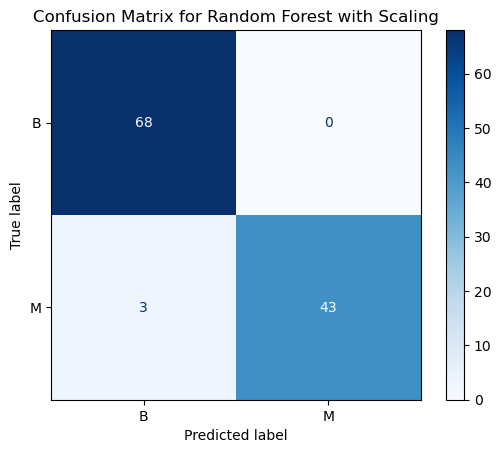

In [33]:
# Confusion Matrix for Random Forest on Scaled Full Dataset
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["B", "M"])
disp_rf.plot(cmap='Blues')
plt.title("Confusion Matrix for Random Forest with Scaling")
plt.show()

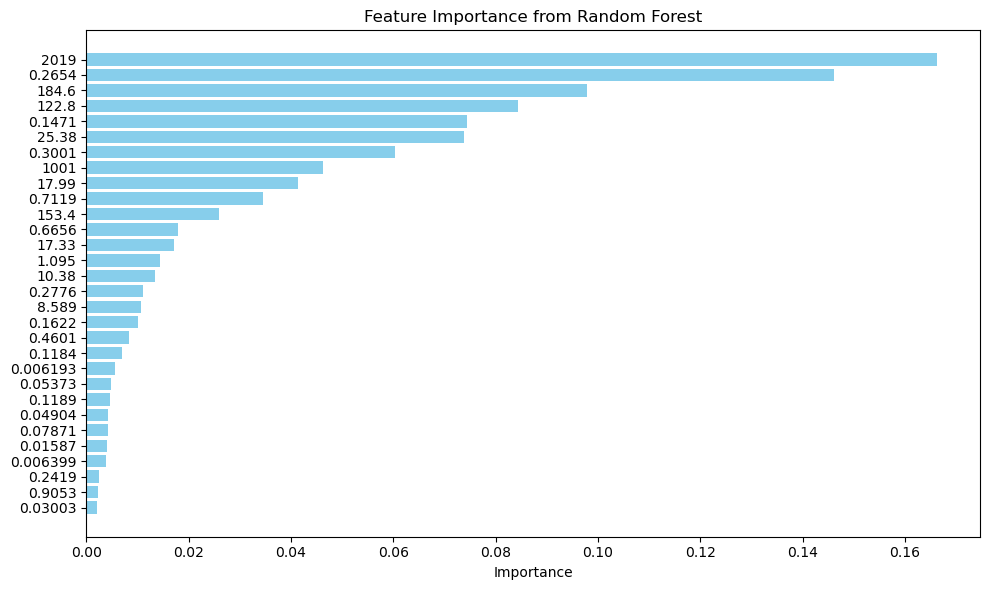

In [34]:
# Feature Importance for Random Forest on Scaled Full Dataset
importances = rf_model.feature_importances_
feature_names = data.columns[1:]
sorted_idx = importances.argsort()
plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], importances[sorted_idx], color="skyblue")
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


Generating ROC Curve for Random Forest with scaling...


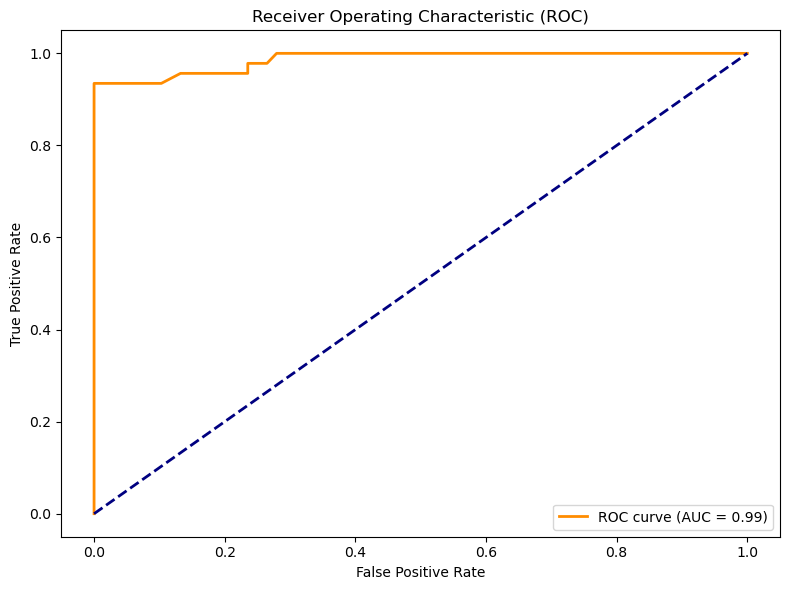

In [35]:
# ROC Curve for Random Forest Model on Scaled Full Dataset
print("\nGenerating ROC Curve for Random Forest with scaling...")
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

### Cross Validaltion on Scaled Full Dataset

In [36]:
# Defining models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "Perceptron": Perceptron(random_state=42, max_iter=1000, tol=1e-3)
}

cv_results = {}

# Performing cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    cv_results[name] = {
        "Mean Accuracy": scores.mean(),
        "Standard Deviation": scores.std()
    }

# Converting results to DataFrame for better visualization
cv_results_df = pd.DataFrame(cv_results).T

# Printing the results
print("\nCross-Validation Results with Scaling:")
print(cv_results_df)


Cross-Validation Results with Scaling:
               Mean Accuracy  Standard Deviation
Random Forest       0.951526            0.019204
XGBoost             0.962540            0.016487
Perceptron          0.969109            0.020291


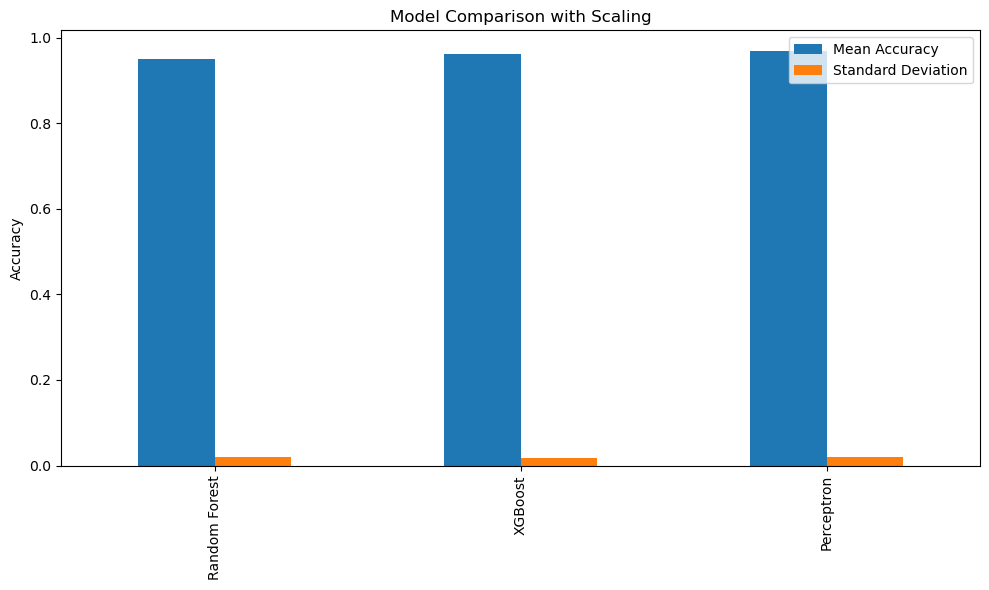

In [37]:
# Ploting cross-validation results on Scaled Full Dataset
cv_results_df.plot(kind='bar', figsize=(10, 6), title="Model Comparison with Scaling")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

# Section 5: Model Training and Evaluation on Scaled Full Dataset With Selected Features

In [38]:
# Selecting top important features based on correlation
important_features = target_correlation.index[1:6]  # Top 5 features excluding the target
print("Selected important features:", important_features)

# Creating a new dataset with selected features
X_reduced = data[important_features]
X_reduced_scaled = scaler.fit_transform(X_reduced)

# Spliting the dataset with reduced features
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(
    X_reduced_scaled, y, test_size=0.2, random_state=42
)

# Training and cross-validate models with reduced features
cv_results_reduced = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train_reduced, y_train_reduced, cv=5, scoring='accuracy', n_jobs=-1)
    cv_results_reduced[name] = {
        "Mean Accuracy": scores.mean(),
        "Standard Deviation": scores.std()
    }

# Converting results to DataFrame
cv_results_reduced_df = pd.DataFrame(cv_results_reduced).T

# Printing the results
print("\nCross-Validation Results with Reduced Features:")
print(cv_results_reduced_df)

Selected important features: Index(['0.2654', '184.6', '0.1471', '25.38', '122.8'], dtype='object')

Cross-Validation Results with Reduced Features:
               Mean Accuracy  Standard Deviation
Random Forest       0.938339            0.020344
XGBoost             0.936093            0.019028
Perceptron          0.951551            0.024654


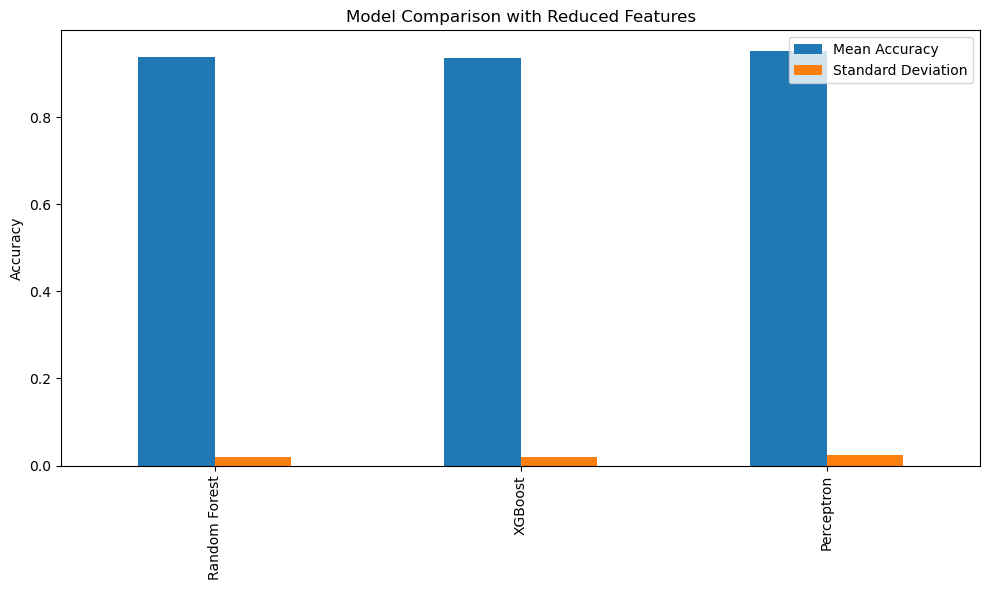

In [39]:
# Ploting cross-validation results with reduced features
cv_results_reduced_df.plot(kind='bar', figsize=(10, 6), title="Model Comparison with Reduced Features")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

# Section 6: Model Training and Evaluation on Scaled Full Dataset With Hyperparameters

In [40]:
# Defining hyperparameter grids
param_grids = {
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "XGBoost": {
        "n_estimators": [50, 100, 200],
        "max_depth": [3, 6, 10],
        "learning_rate": [0.01, 0.1, 0.2]
    },
    "Perceptron": {
        "penalty": [None, "l2", "elasticnet"],
        "alpha": [0.0001, 0.001, 0.01],
        "max_iter": [1000, 2000, 5000]
    }
}

# Models to tune
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "Perceptron": Perceptron(random_state=42)
}

# Performing hyperparameter tuning
best_params = {}
best_scores = {}

for name, model in models.items():
    print(f"Tuning {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params[name] = grid_search.best_params_
    best_scores[name] = grid_search.best_score_

# Displaying best parameters and scores
print("\nBest Parameters and Scores:")
for name in best_params:
    print(f"{name}: Best Params: {best_params[name]}, Best Score: {best_scores[name]:.4f}")

Tuning Random Forest...
Tuning XGBoost...


C:\Users\kazan\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:39:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tuning Perceptron...

Best Parameters and Scores:
Random Forest: Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}, Best Score: 0.9559
XGBoost: Best Params: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}, Best Score: 0.9670
Perceptron: Best Params: {'alpha': 0.0001, 'max_iter': 1000, 'penalty': 'elasticnet'}, Best Score: 0.9780


### Model Evaluation with Tuned Parameters


Evaluating Random Forest with Best Parameters...

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        68
           1       0.98      0.93      0.96        46

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Evaluating XGBoost with Best Parameters...


C:\Users\kazan\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:39:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        68
           1       0.98      0.89      0.93        46

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Evaluating Perceptron with Best Parameters...

Classification Report for Perceptron:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        68
           1       1.00      0.93      0.97        46

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Perceptron does not support predict_proba, skipping ROC curve.


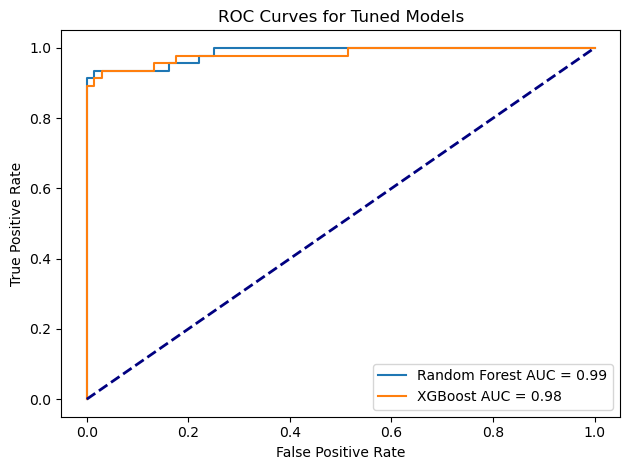

In [41]:
# Training and evaluate models with best parameters
for name, model in models.items():
    print(f"\nEvaluating {name} with Best Parameters...")
    model.set_params(**best_params[name])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred))

    # Checking if the model supports predict_proba
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        
        # Ploting the ROC curve for the model
        plt.plot(fpr, tpr, label=f'{name} AUC = {roc_auc:.2f}')
    else:
        # Informing that ROC curve cannot be plotted if the model lacks predict_proba
        print(f"{name} does not support predict_proba, skipping ROC curve.")

# Adding diagonal line (baseline) to the ROC curve        
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Adding labels and title to the ROC plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Tuned Models')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

### Training Random Forest with tuned hyperparameters

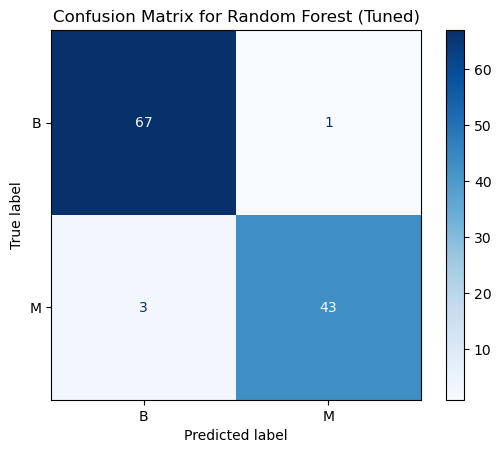

In [42]:
# Training Random Forest with tuned hyperparameters
rf_model_tuned = RandomForestClassifier(**best_params["Random Forest"], random_state=42)
rf_model_tuned.fit(X_train, y_train)
y_pred_rf_tuned = rf_model_tuned.predict(X_test)

# Confusion Matrix for Random Forest
cm_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)
disp_rf_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_rf_tuned, display_labels=["B", "M"])
disp_rf_tuned.plot(cmap='Blues')
plt.title("Confusion Matrix for Random Forest (Tuned)")
plt.show()

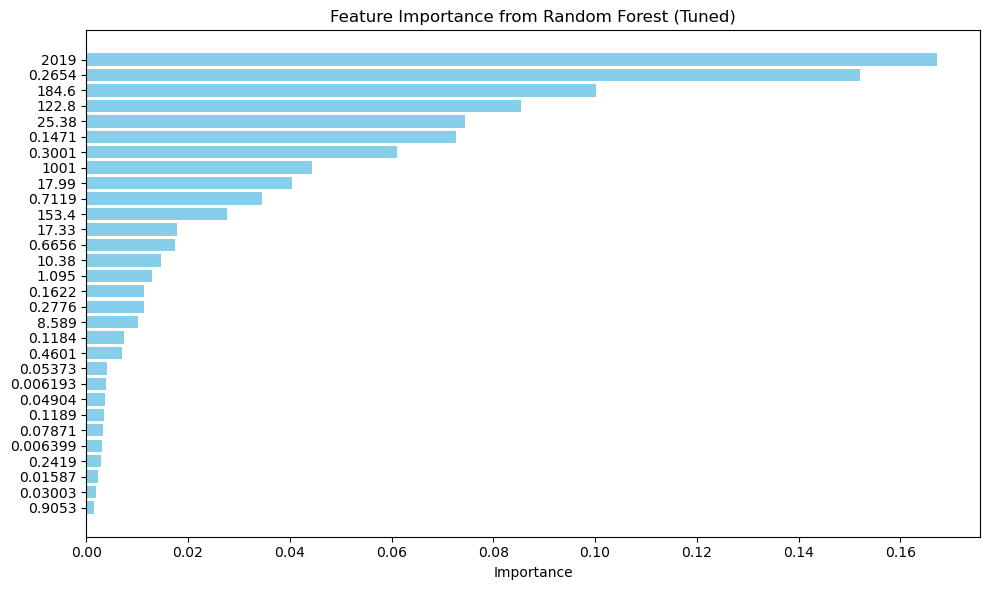

In [43]:
# Feature Importance for Random Forest
importances = rf_model_tuned.feature_importances_
feature_names = data.columns[1:]
sorted_idx = importances.argsort()
plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], importances[sorted_idx], color="skyblue")
plt.title("Feature Importance from Random Forest (Tuned)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

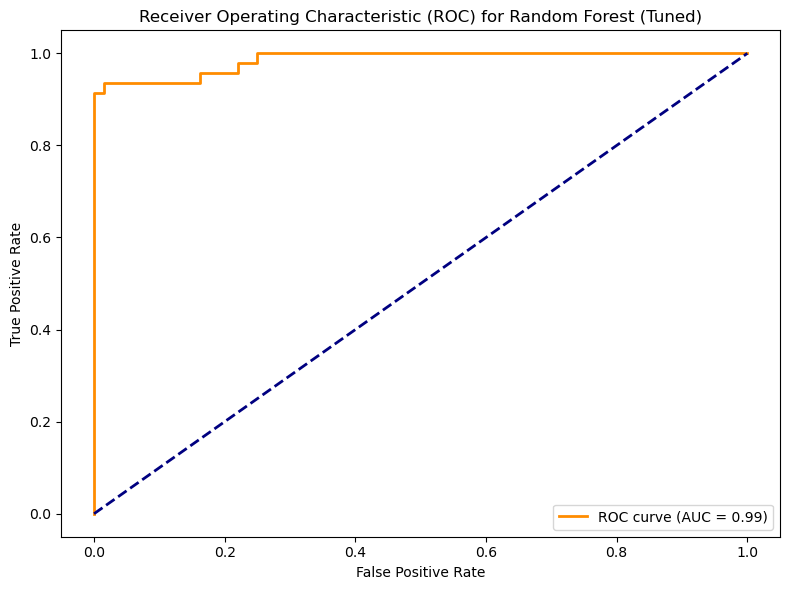

In [44]:
# ROC Curve for Random Forest
y_pred_proba_rf_tuned = rf_model_tuned.predict_proba(X_test)[:, 1]
fpr_rf_tuned, tpr_rf_tuned, _ = roc_curve(y_test, y_pred_proba_rf_tuned)
roc_auc_rf_tuned = auc(fpr_rf_tuned, tpr_rf_tuned)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_tuned, tpr_rf_tuned, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Random Forest (Tuned)')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

### Training Perceptron with tuned hyperparameters

In [45]:
# Training Perceptron with tuned hyperparameters
perceptron_model_tuned = Perceptron(**best_params["Perceptron"], random_state=42)
perceptron_model_tuned.fit(X_train, y_train)
y_pred_perceptron_tuned = perceptron_model_tuned.predict(X_test)

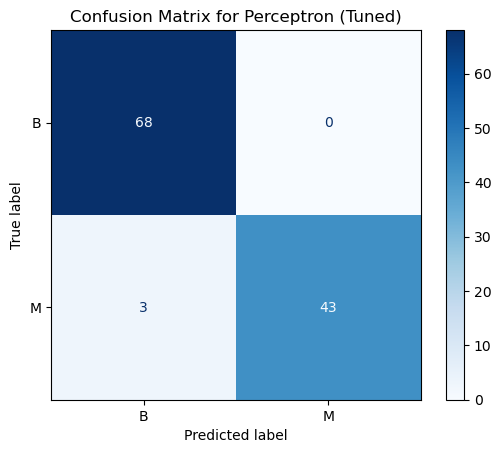

Classification Report for Perceptron (Tuned):
              precision    recall  f1-score   support

           B       0.96      1.00      0.98        68
           M       1.00      0.93      0.97        46

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [46]:
# Confusion Matrix for Perceptron
cm_perceptron_tuned = confusion_matrix(y_test, y_pred_perceptron_tuned)
disp_perceptron_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_perceptron_tuned, display_labels=["B", "M"])
disp_perceptron_tuned.plot(cmap='Blues')
plt.title("Confusion Matrix for Perceptron (Tuned)")
plt.show()

# Classification Report for Perceptron
print("Classification Report for Perceptron (Tuned):")
print(classification_report(y_test, y_pred_perceptron_tuned, target_names=["B", "M"]))

# Results from all scenarios

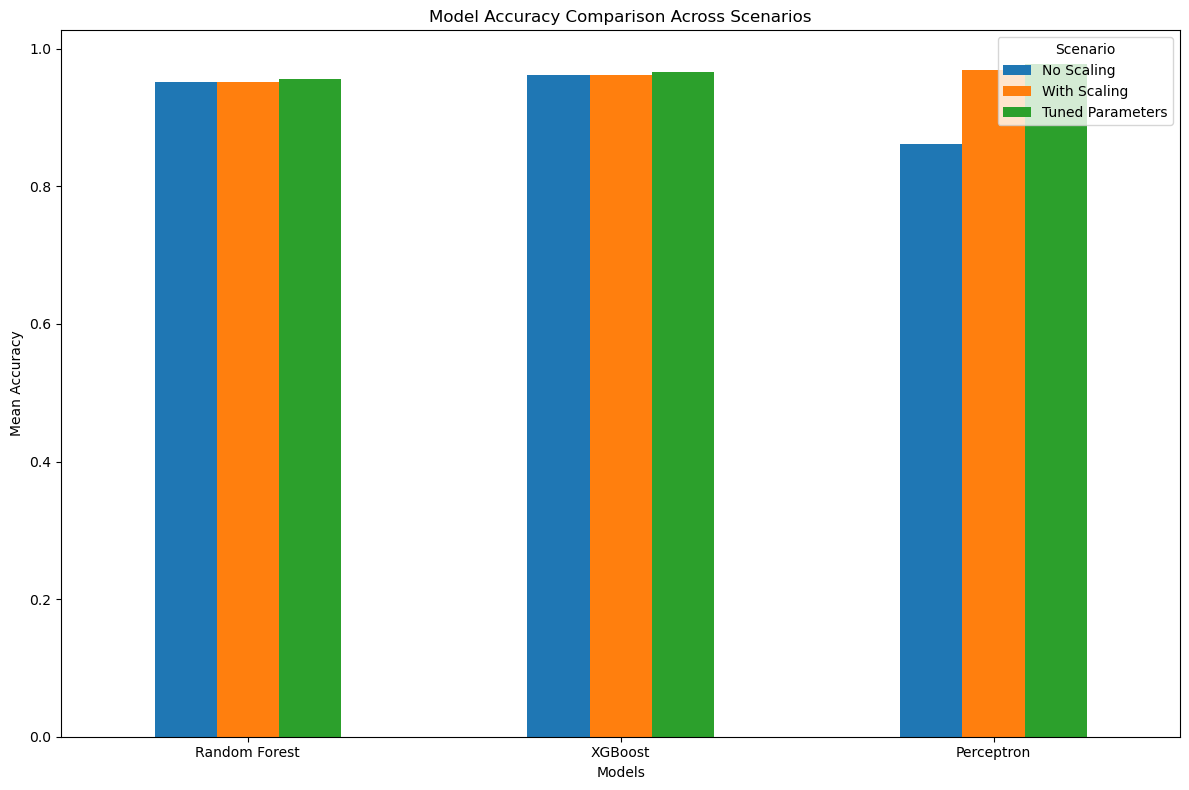

In [47]:
# Results from all scenarios
results_no_scaling = {
    "Random Forest": {"Mean Accuracy": 0.9515, "Standard Deviation": 0.0192},
    "XGBoost": {"Mean Accuracy": 0.9625, "Standard Deviation": 0.0165},
    "Perceptron": {"Mean Accuracy": 0.8613, "Standard Deviation": 0.0578},
}

results_scaling = {
    "Random Forest": {"Mean Accuracy": 0.9515, "Standard Deviation": 0.0192},
    "XGBoost": {"Mean Accuracy": 0.9625, "Standard Deviation": 0.0165},
    "Perceptron": {"Mean Accuracy": 0.9691, "Standard Deviation": 0.0203},
}

results_tuned = {
    "Random Forest": {"Mean Accuracy": 0.9559, "Standard Deviation": None},
    "XGBoost": {"Mean Accuracy": 0.9670, "Standard Deviation": None},
    "Perceptron": {"Mean Accuracy": 0.9780, "Standard Deviation": None},
}

# Combining results into a DataFrame for better visualization
comparison_df = pd.DataFrame({
    "No Scaling": {key: val["Mean Accuracy"] for key, val in results_no_scaling.items()},
    "With Scaling": {key: val["Mean Accuracy"] for key, val in results_scaling.items()},
    "Tuned Parameters": {key: val["Mean Accuracy"] for key, val in results_tuned.items()},
})

# Ploting comparison of accuracies
comparison_df.plot(kind="bar", figsize=(12, 8), title="Model Accuracy Comparison Across Scenarios")
plt.ylabel("Mean Accuracy")
plt.xlabel("Models")
plt.xticks(rotation=0)
plt.legend(title="Scenario")
plt.tight_layout()
plt.show()

# XAI with LIME

In [48]:
import lime
from lime import lime_tabular

### Creating LIME explainer to compare with feature importants

In [49]:
# Creating LIME explainer
explainer_lime = lime_tabular.LimeTabularExplainer(
    training_data=X_train,
    mode='classification',
    training_labels=y_train,
    feature_names=data.columns[1:],
    class_names=["B", "M"]
)

# Selecting a single instance for explanation
idx = 3  # Index of the instance in the test set
lime_exp = explainer_lime.explain_instance(
    data_row=X_test[idx],
    predict_fn=rf_model_tuned.predict_proba
)

# Displaying the explanation
lime_exp.show_in_notebook()


LIME Explanation for Instance:
                   Feature  Contribution
0           17.33 <= -0.78     -0.054132
1           10.38 <= -0.75     -0.038441
2  -0.75 < 0.1471 <= -0.42     -0.027979
3   -0.23 < 0.7119 <= 0.53      0.026231
4           1.095 <= -0.64     -0.021699
5   -0.50 < 153.4 <= -0.35     -0.020889
6  -0.78 < 0.3001 <= -0.37     -0.019580
7    -0.29 < 184.6 <= 0.54      0.019199
8    -0.28 < 25.38 <= 0.47      0.015160
9  -0.79 < 0.1622 <= -0.05     -0.014570


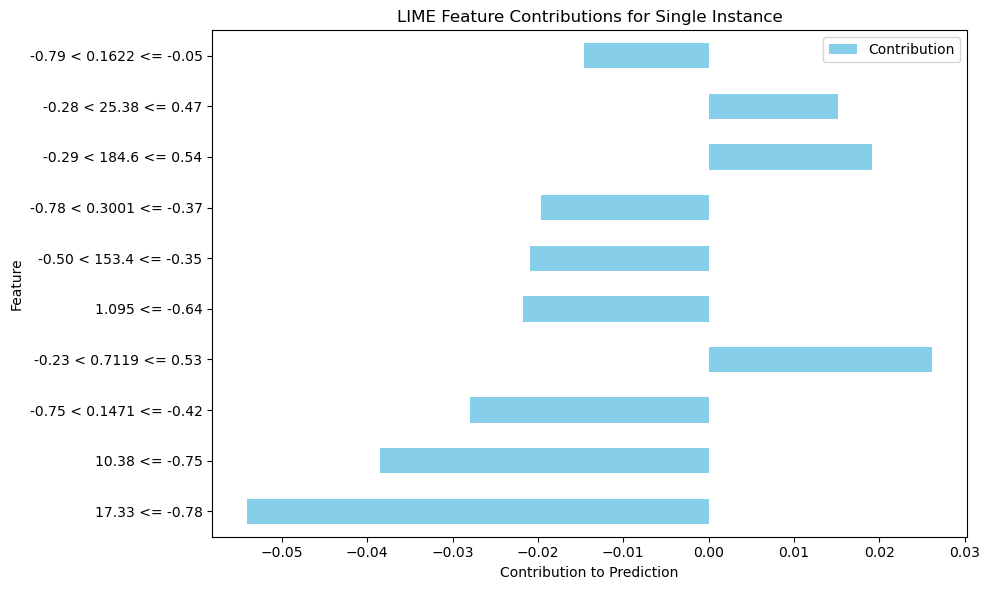

In [50]:
# Extracting LIME explanation as a DataFrame
lime_explanation = pd.DataFrame(lime_exp.as_list(), columns=['Feature', 'Contribution'])

# Displaying LIME contributions
print("\nLIME Explanation for Instance:")
print(lime_explanation)

# Ploting LIME contributions
lime_explanation.plot(kind='barh', x='Feature', y='Contribution', color='skyblue', figsize=(10, 6))
plt.title('LIME Feature Contributions for Single Instance')
plt.xlabel('Contribution to Prediction')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()